In [ ]:
# Init pack

import numpy as np
import h5py
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt

psi = np.load('/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy')

# Pre-processing

lead = 1

trainN = 200000
valN = 50000
index = 63

psi = psi[:,1,:]

print(psi.shape)
mean_psi = np.mean(psi, axis=0, keepdims=True)
std_psi = np.std(psi, axis=0, keepdims=True)
psi = (psi - mean_psi) / std_psi

psi_train_input = torch.tensor(psi[0:trainN,:])
psi_train_label =  torch.tensor(psi[lead:trainN+lead,:])

psi_val_input = torch.tensor(psi[trainN:trainN+valN,:])
psi_val_label =  torch.tensor(psi[trainN+lead:trainN+valN+lead,:])

print(psi_train_input.shape)
print(psi_train_label.shape)
print(psi_val_input.shape)
print(psi_val_label.shape)
print(np.shape(psi))
plt.plot(psi_train_input[0:200000,63])
plt.plot(psi_val_input[0:50000,63])

# STOCHASTICITY TESTS

In [ ]:
# Architecture withOUT Stochastic Component

torch.manual_seed(42)
latent_dim = 1024
batch_size = 1024
num_epochs = 100

# Define the encoder (MLP)
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(75, 512)  # Input layer (2 + 2) -> Hidden layer (128)
        self.fc2 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc3 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc4 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc5 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc6 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc_mu = nn.Linear(512, latent_dim)  # Hidden layer (128) -> Latent space (2)
        self.fc_logvar = nn.Linear(512, latent_dim)  # Hidden layer (128) -> Log variance (2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function for hidden layer
        x = torch.relu(self.fc2(x)) + x
        x = torch.relu(self.fc3(x)) + x
        x = torch.relu(self.fc4(x)) + x
        x = torch.relu(self.fc5(x)) + x
        x = torch.relu(self.fc6(x)) + x
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + 75, 512)  # Input layer (2 + 2) -> Hidden layer (128)
        self.fc2 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc3 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc4 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc5 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc6 = nn.Linear(512, 512)  # Hidden layer (128) -> Hidden layer (128)
        self.fc_output = nn.Linear(512, 75)  # Hidden layer (128) -> Output layer (2)

    def forward(self, z, condition):
        z = torch.cat((z, condition), dim=1)  # Concatenate latent vector and condition
        z = torch.relu(self.fc1(z))  # Activation function for hidden layer
        z = torch.relu(self.fc2(z)) + z
        z = torch.relu(self.fc3(z)) + z
        z = torch.relu(self.fc4(z)) + z
        z = torch.relu(self.fc5(z)) + z
        z = torch.relu(self.fc6(z)) + z
        output = self.fc_output(z)
        return output

# Define the VAE model
class ConditionalVAE(nn.Module):
    def __init__(self,latent_dim):
        super(ConditionalVAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def encode(self, x):
        mu, logvar = self.encoder(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        return mu

    def decode(self, z, condition):
        return self.decoder(z, condition)

    def forward(self, x, condition):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        output = self.decode(z, condition)
        return output, mu, logvar


Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_0/timeseries
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_0/expo_fit
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_0/2D
Epoch 1, 
                Reconstrunction Loss: 746.41943359375,
                KL Divergence Loss: 1487.697021484375

                Validation Reconstrunction Loss: 1643.1094970703125,
                Validation KL Divergence Loss: 3881.059326171875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


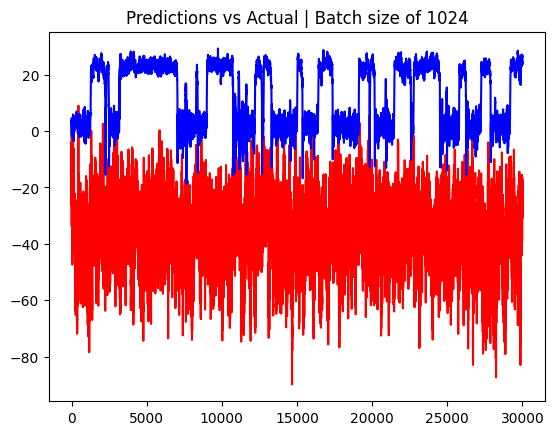

No transitions detected in predictions with current bounds!


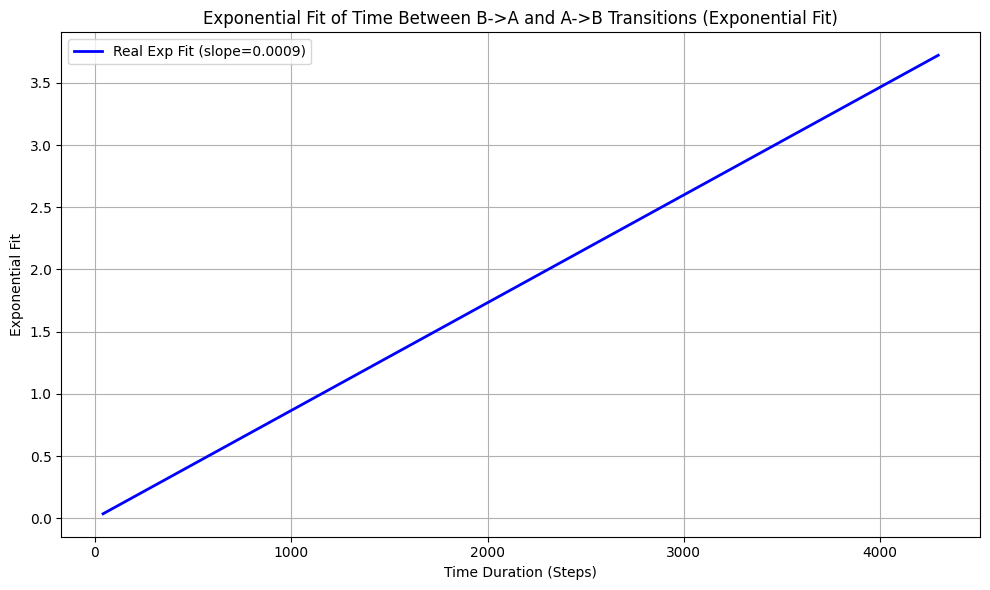

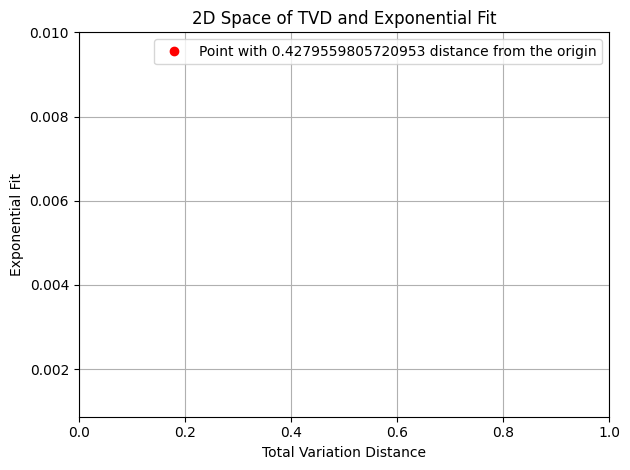

Epoch 2, 
                Reconstrunction Loss: 892.3736572265625,
                KL Divergence Loss: 765.5313720703125

                Validation Reconstrunction Loss: 1925.28076171875,
                Validation KL Divergence Loss: 1909.972900390625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


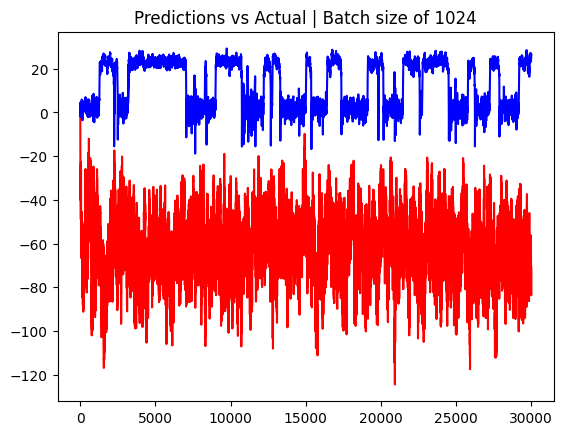

No transitions detected in predictions with current bounds!


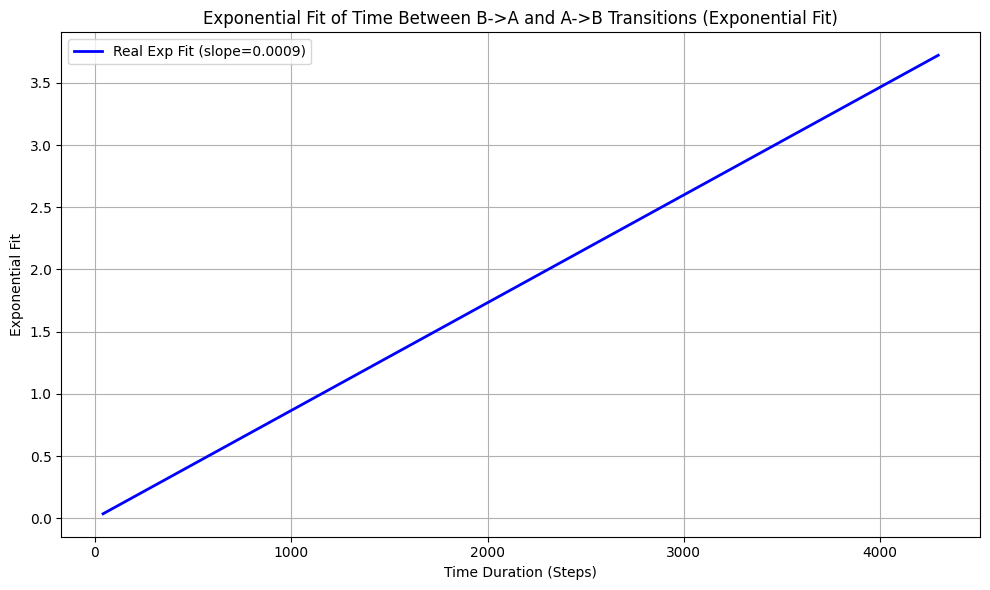

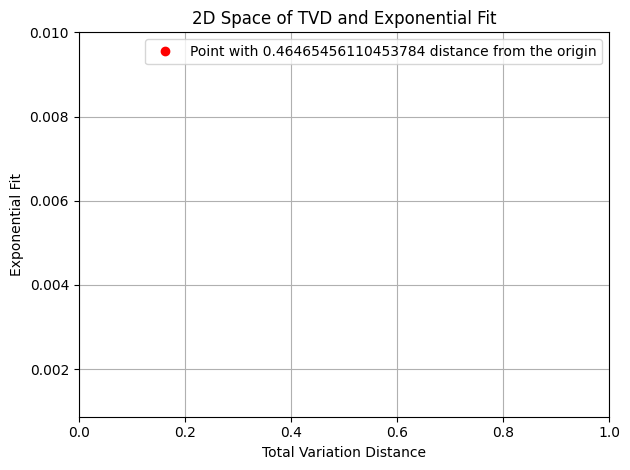

Epoch 3, 
                Reconstrunction Loss: 445.39739990234375,
                KL Divergence Loss: 509.2154846191406

                Validation Reconstrunction Loss: 794.6492919921875,
                Validation KL Divergence Loss: 1246.267333984375
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


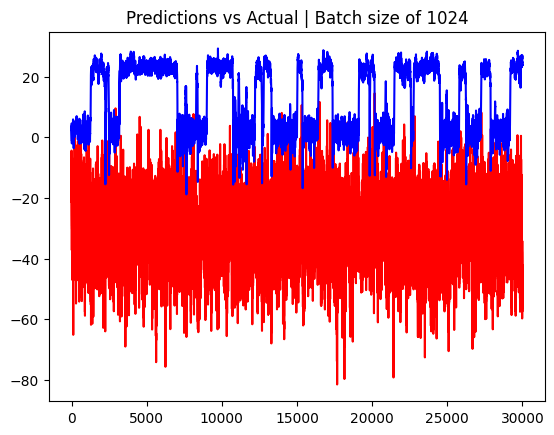

No transitions detected in predictions with current bounds!


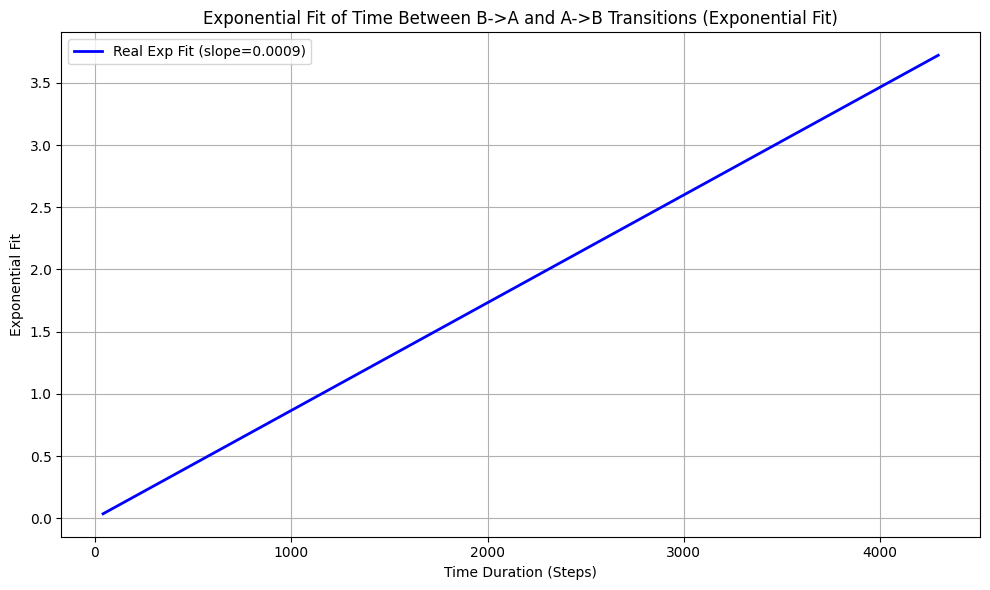

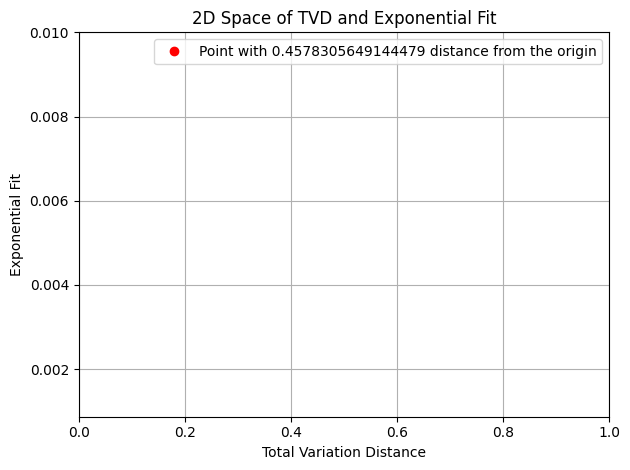

Epoch 4, 
                Reconstrunction Loss: 250.94427490234375,
                KL Divergence Loss: 384.3384094238281

                Validation Reconstrunction Loss: 647.8403930664062,
                Validation KL Divergence Loss: 932.677978515625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


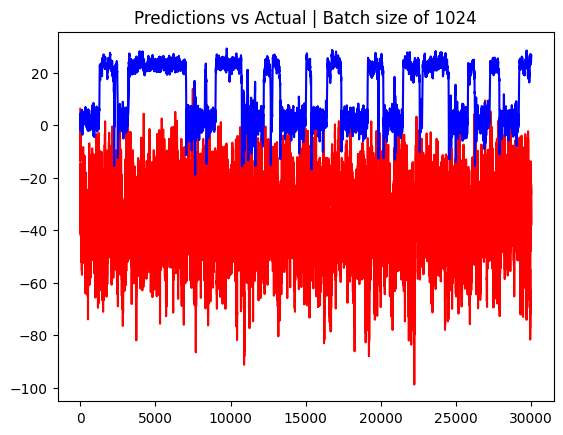

No transitions detected in predictions with current bounds!


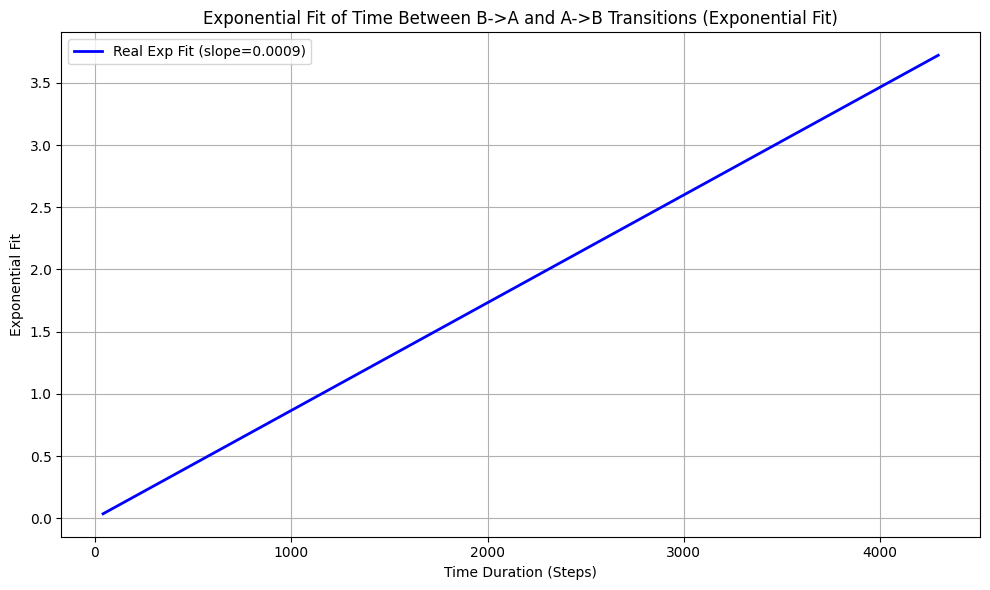

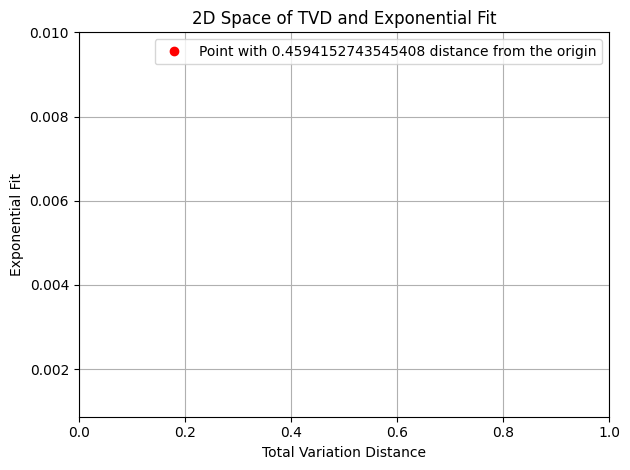

Epoch 5, 
                Reconstrunction Loss: 214.42127990722656,
                KL Divergence Loss: 305.2084045410156

                Validation Reconstrunction Loss: 739.72998046875,
                Validation KL Divergence Loss: 738.3087768554688
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


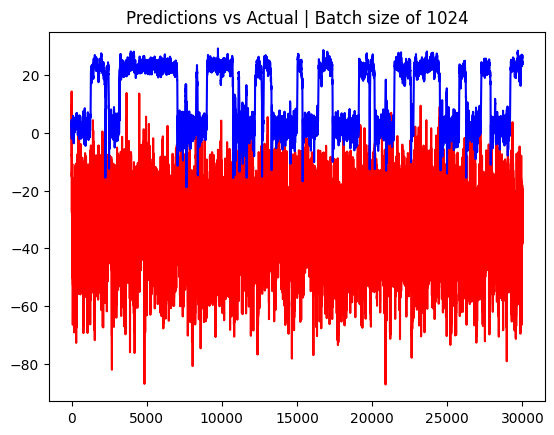

No transitions detected in predictions with current bounds!


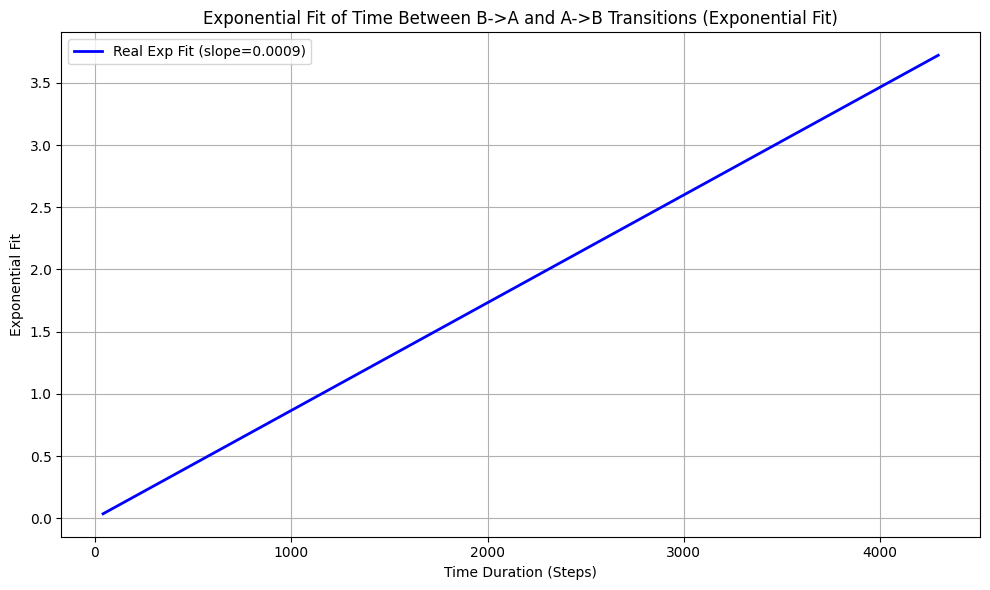

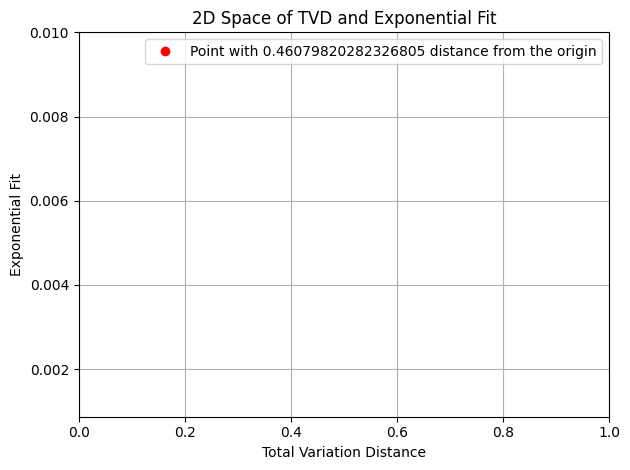

Epoch 6, 
                Reconstrunction Loss: 232.1790008544922,
                KL Divergence Loss: 252.4874725341797

                Validation Reconstrunction Loss: 671.3106689453125,
                Validation KL Divergence Loss: 609.951171875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


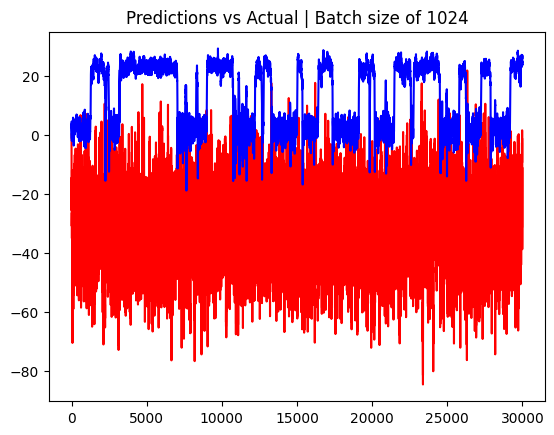

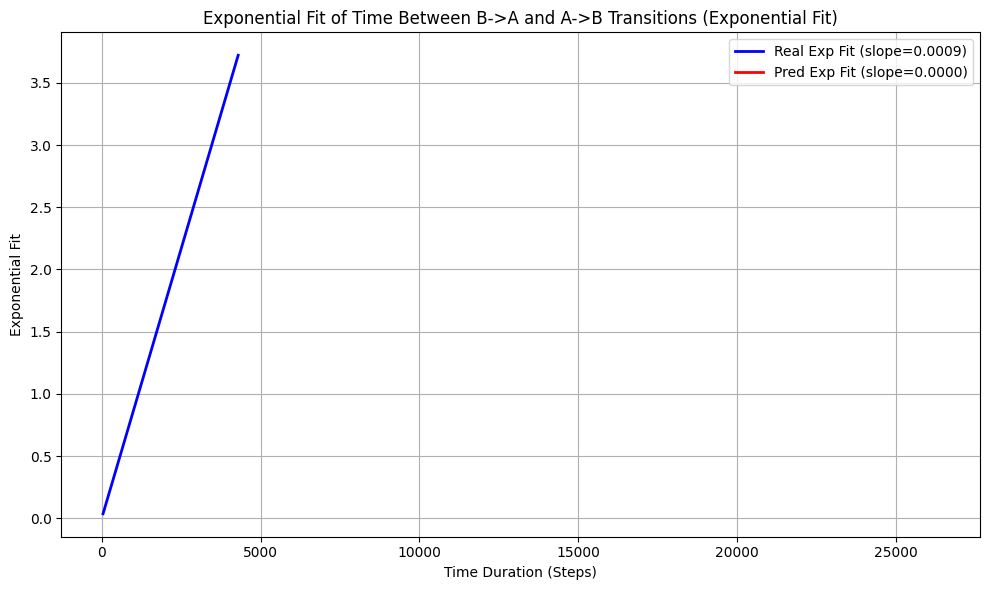

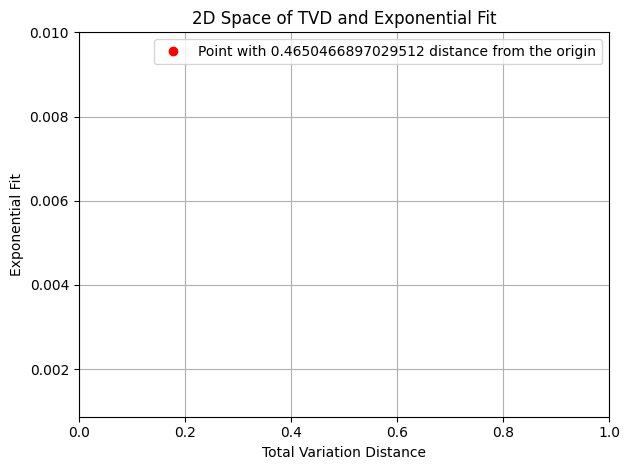

Epoch 7, 
                Reconstrunction Loss: 213.00747680664062,
                KL Divergence Loss: 213.98580932617188

                Validation Reconstrunction Loss: 625.7723388671875,
                Validation KL Divergence Loss: 517.3851928710938
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


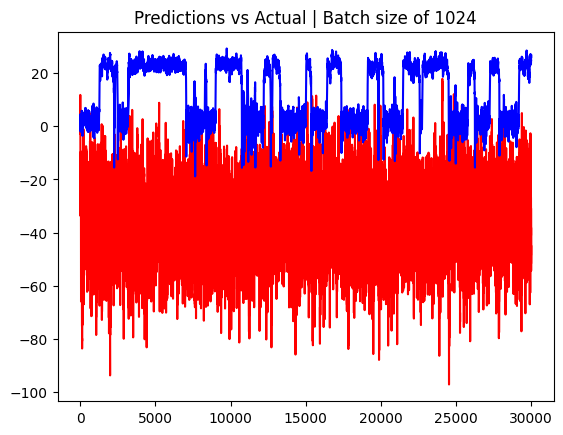

No transitions detected in predictions with current bounds!


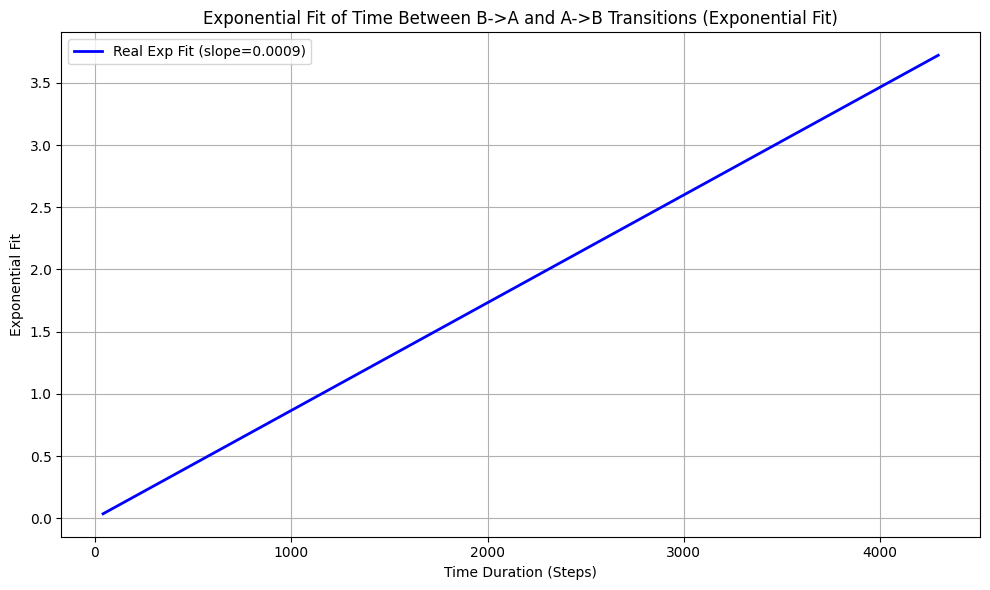

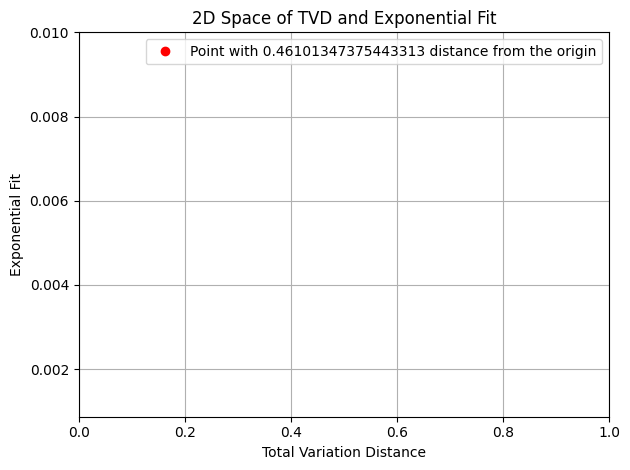

Epoch 8, 
                Reconstrunction Loss: 158.1365966796875,
                KL Divergence Loss: 182.12017822265625

                Validation Reconstrunction Loss: 490.18060302734375,
                Validation KL Divergence Loss: 441.4960021972656
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


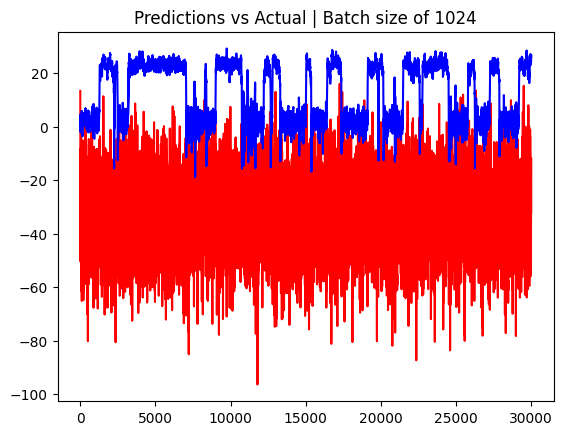

No transitions detected in predictions with current bounds!


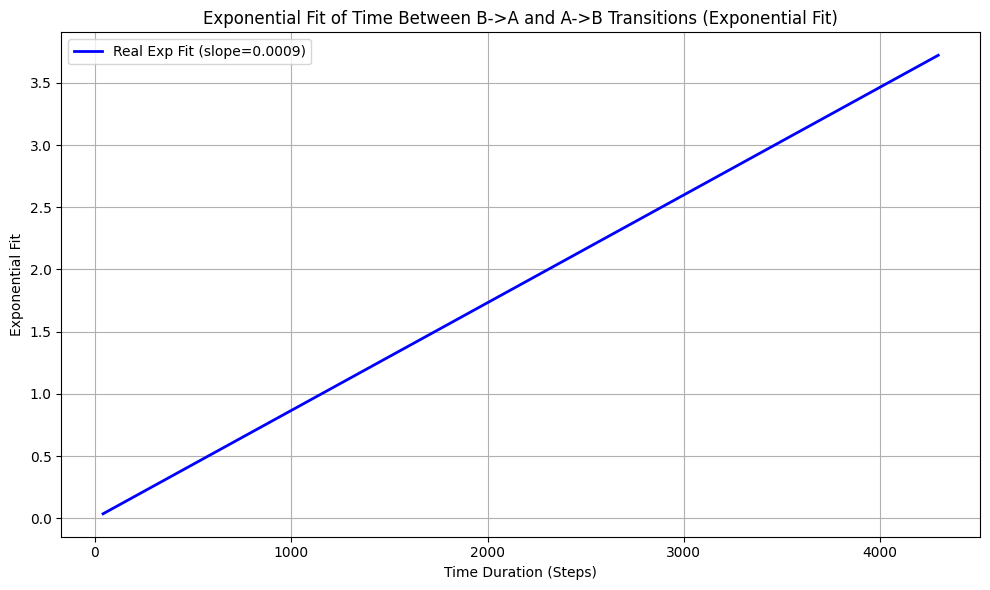

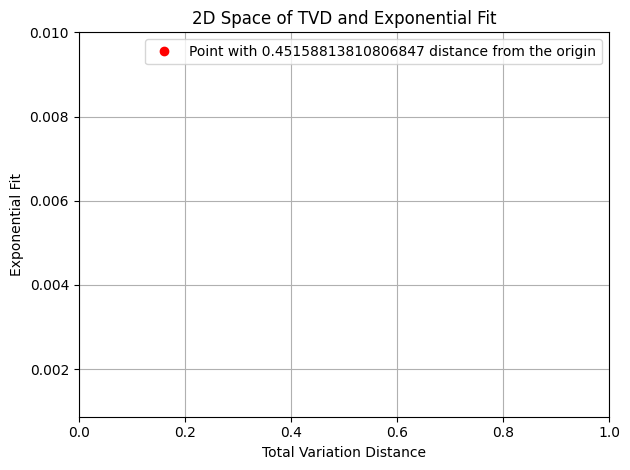

Epoch 9, 
                Reconstrunction Loss: 269.4967041015625,
                KL Divergence Loss: 159.8160400390625

                Validation Reconstrunction Loss: 690.1995849609375,
                Validation KL Divergence Loss: 386.0326843261719
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


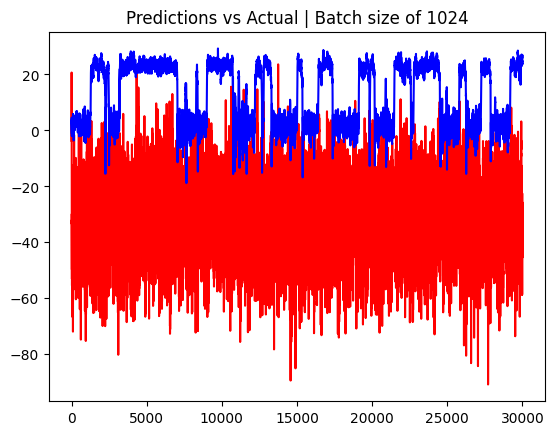

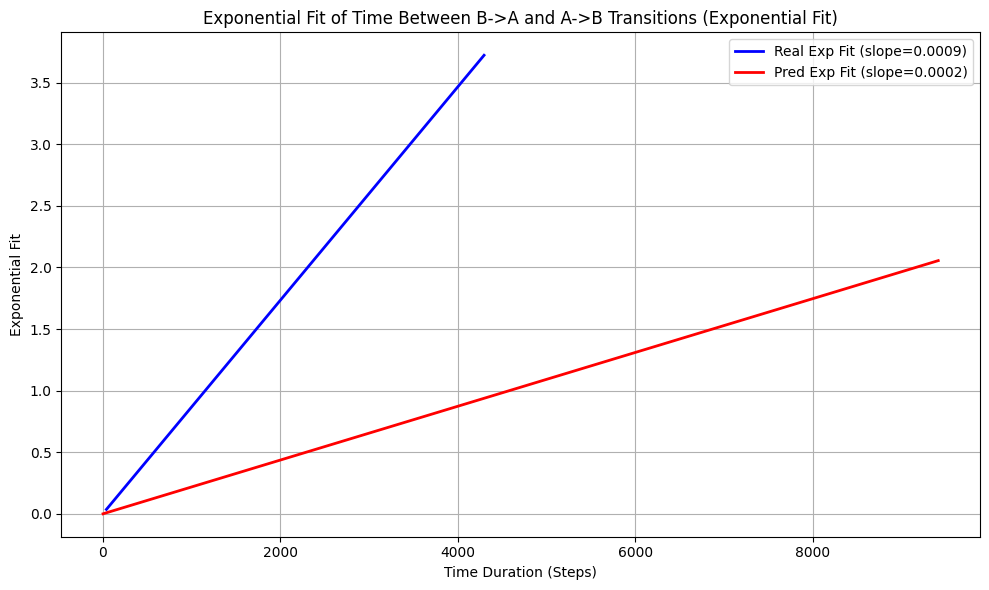

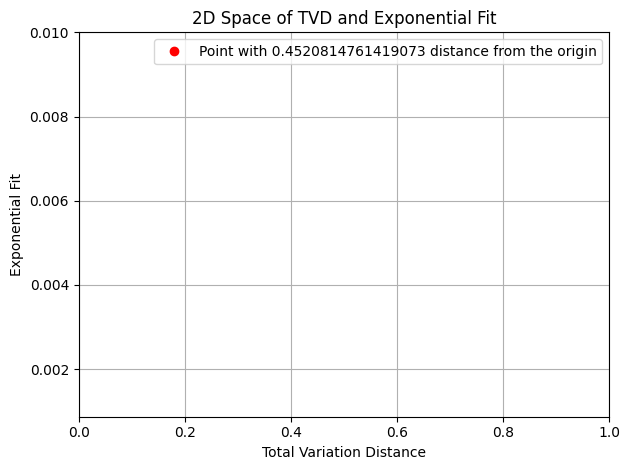

Epoch 10, 
                Reconstrunction Loss: 137.6978302001953,
                KL Divergence Loss: 139.61245727539062

                Validation Reconstrunction Loss: 360.6950988769531,
                Validation KL Divergence Loss: 336.9478759765625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


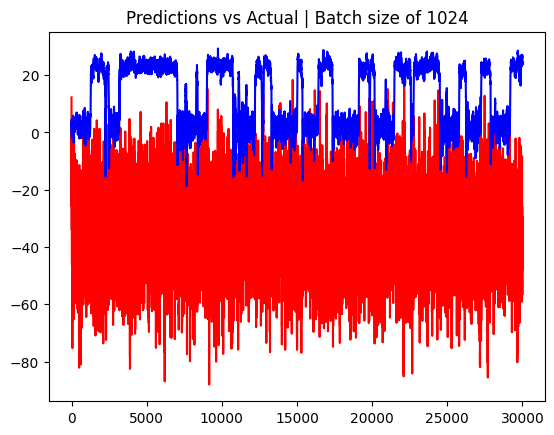

No transitions detected in predictions with current bounds!


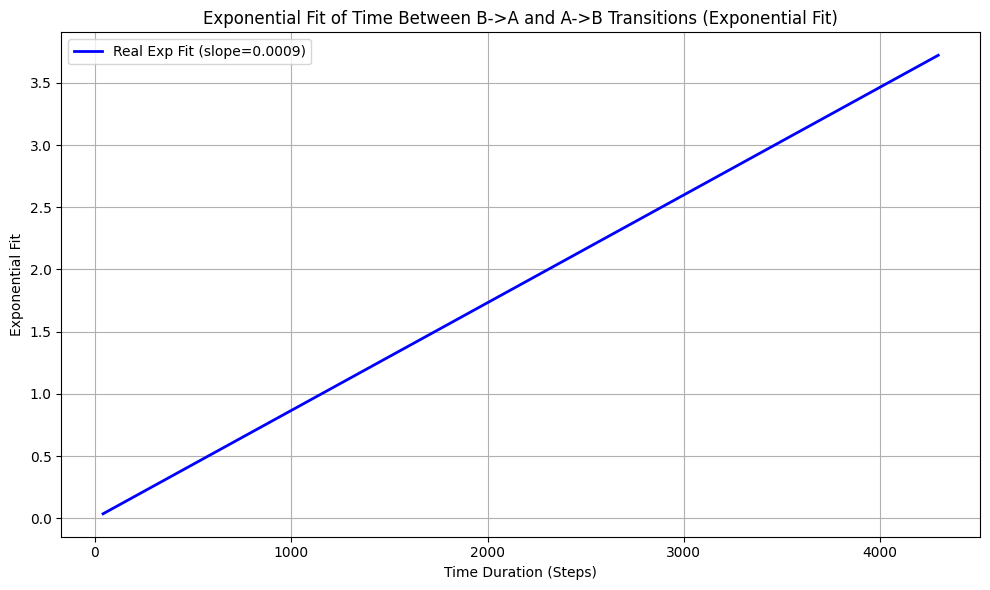

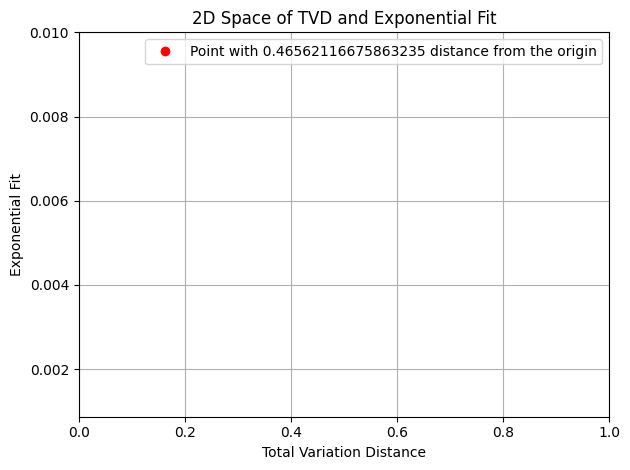

Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_1/timeseries
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_1/expo_fit
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_1/2D
Epoch 1, 
                Reconstrunction Loss: 722.3243408203125,
                KL Divergence Loss: 1569.969970703125

                Validation Reconstrunction Loss: 1581.4814453125,
                Validation KL Divergence Loss: 4105.08056640625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


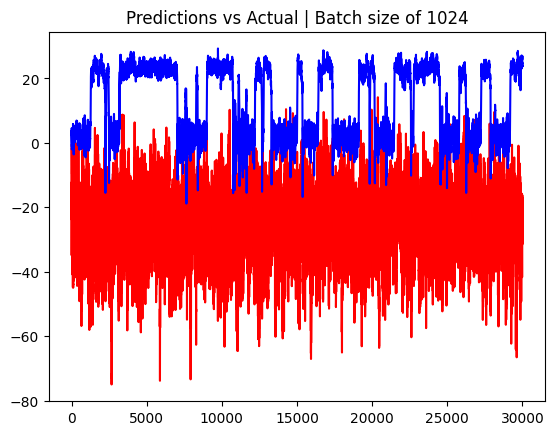

No transitions detected in predictions with current bounds!


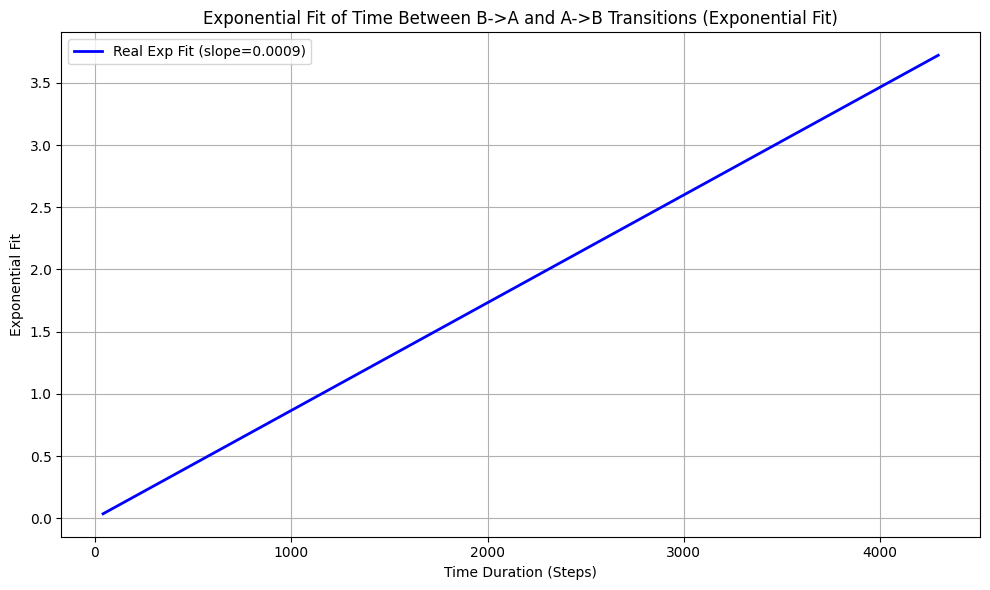

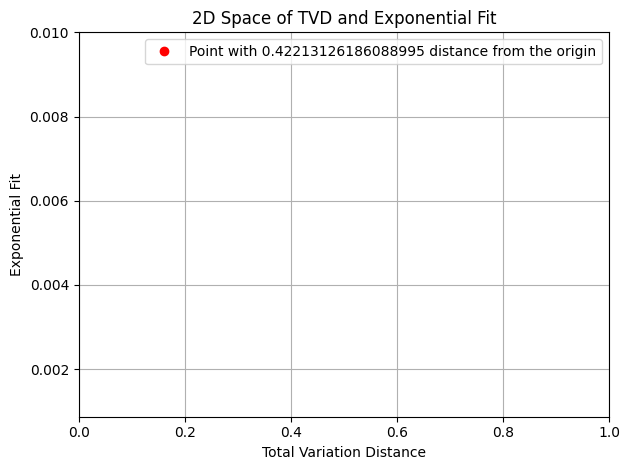

Epoch 2, 
                Reconstrunction Loss: 1166.37158203125,
                KL Divergence Loss: 818.7747802734375

                Validation Reconstrunction Loss: 2808.265625,
                Validation KL Divergence Loss: 2034.439208984375
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


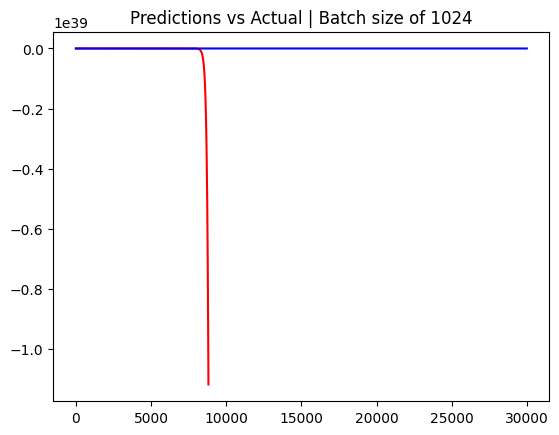

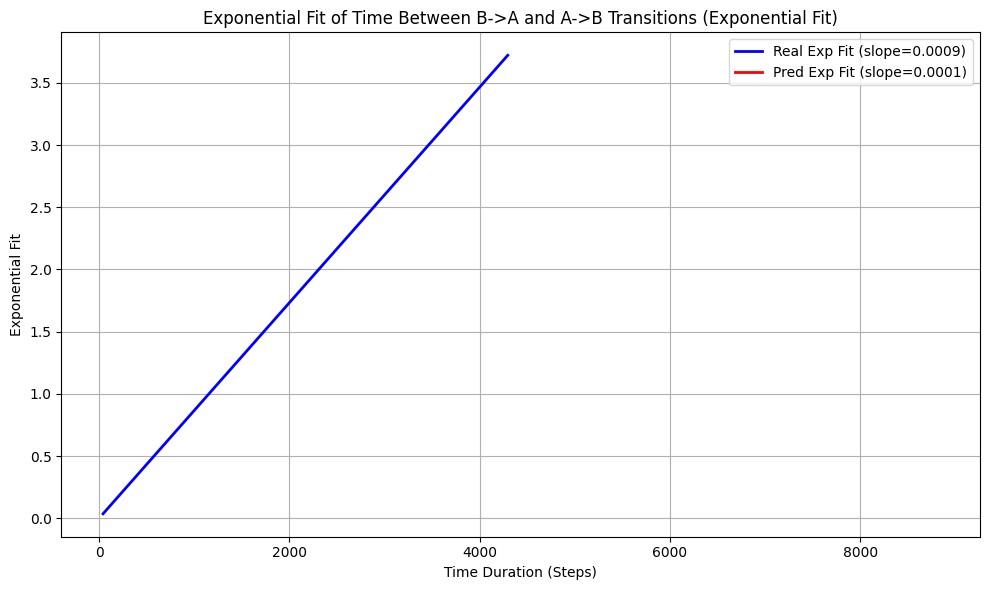

Weights experienced explosion!
Epoch 3, 
                Reconstrunction Loss: 548.9429931640625,
                KL Divergence Loss: 562.266845703125

                Validation Reconstrunction Loss: 1969.181640625,
                Validation KL Divergence Loss: 1369.0435791015625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


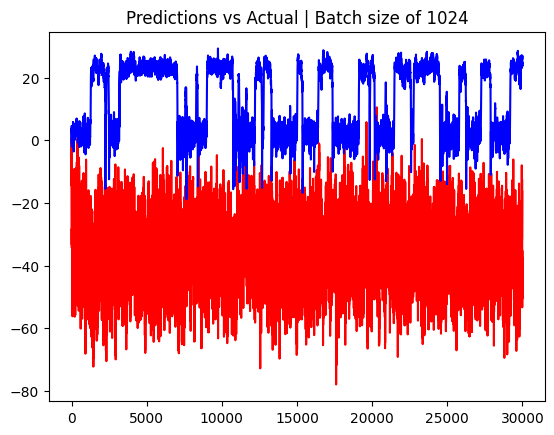

No transitions detected in predictions with current bounds!


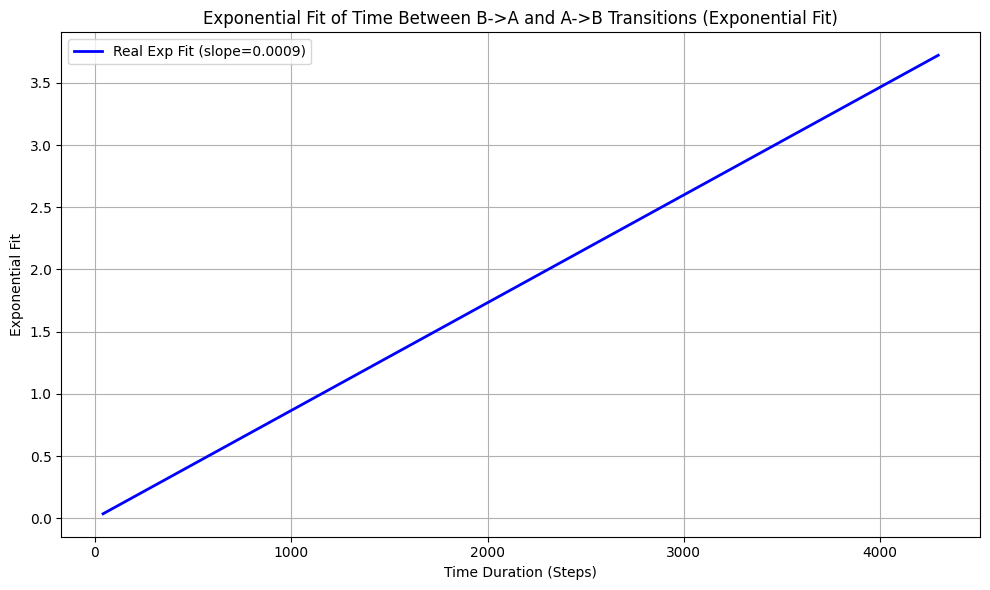

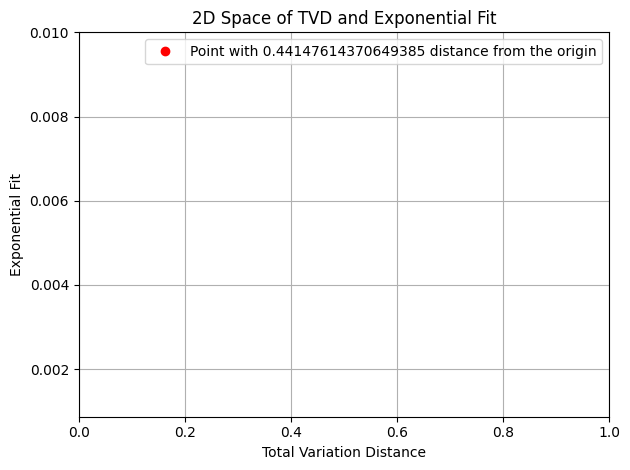

Epoch 4, 
                Reconstrunction Loss: 215.3909912109375,
                KL Divergence Loss: 411.62518310546875

                Validation Reconstrunction Loss: 528.3396606445312,
                Validation KL Divergence Loss: 985.1693725585938
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


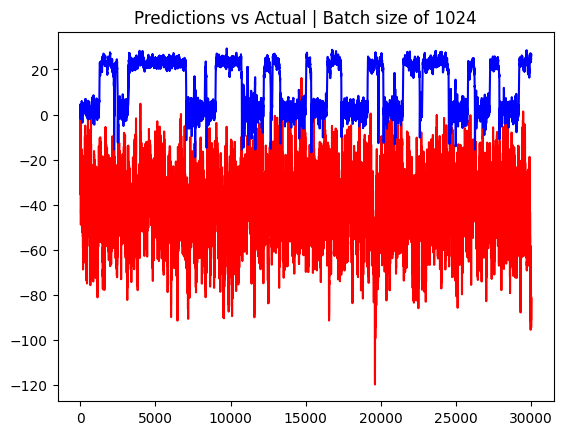

No transitions detected in predictions with current bounds!


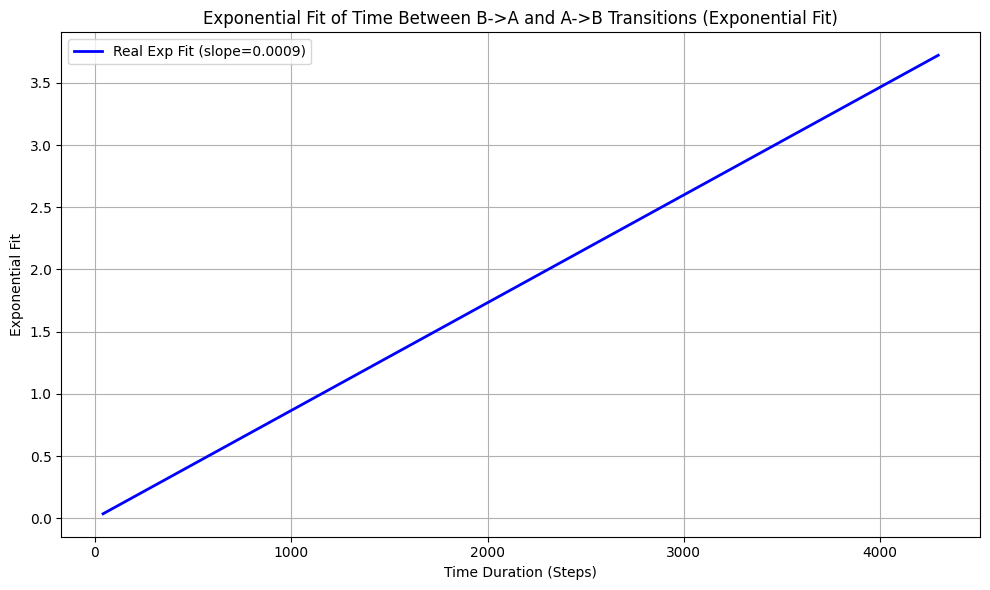

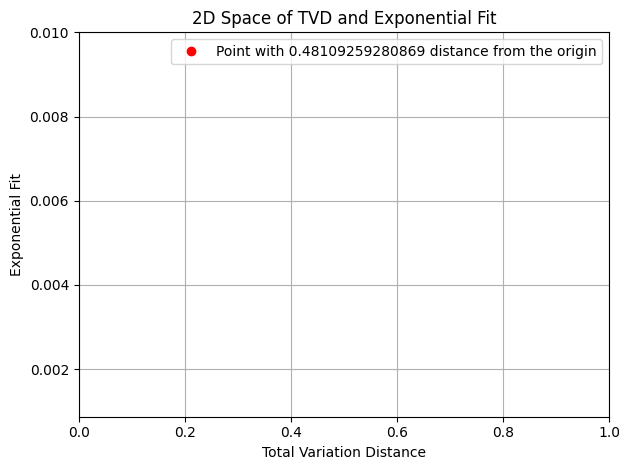

Epoch 5, 
                Reconstrunction Loss: 219.65574645996094,
                KL Divergence Loss: 328.16253662109375

                Validation Reconstrunction Loss: 572.0438232421875,
                Validation KL Divergence Loss: 784.0216064453125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


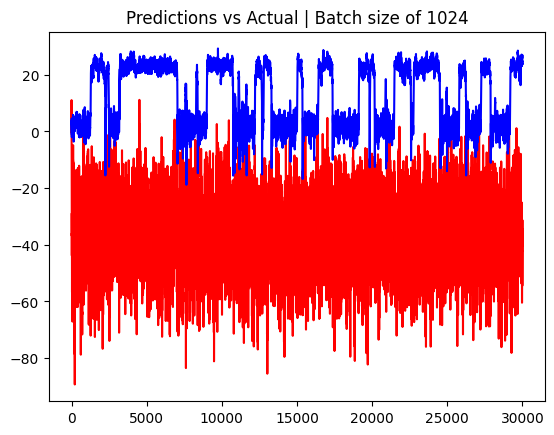

No transitions detected in predictions with current bounds!


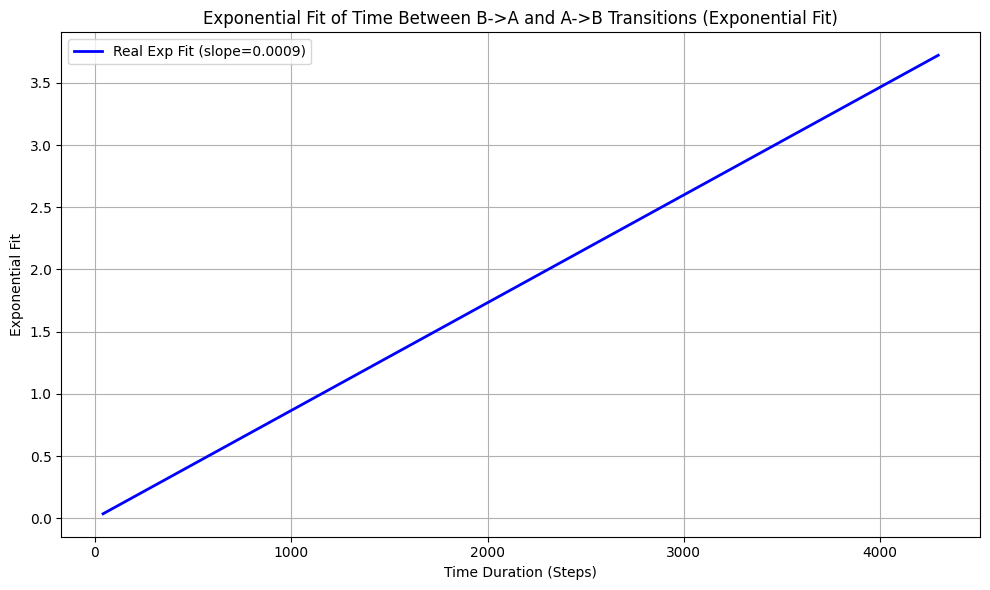

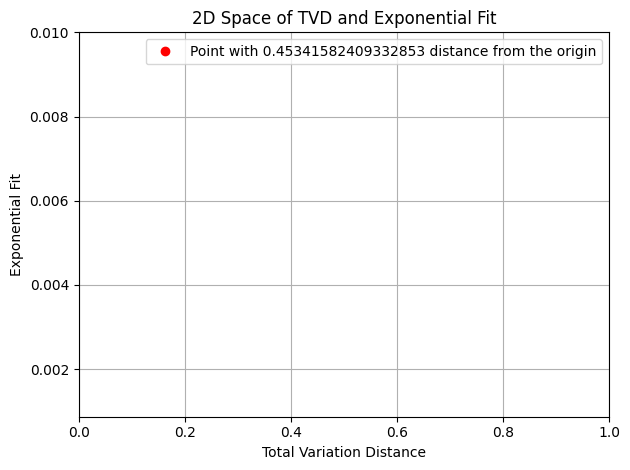

Epoch 6, 
                Reconstrunction Loss: 352.6037902832031,
                KL Divergence Loss: 281.2603759765625

                Validation Reconstrunction Loss: 1135.28369140625,
                Validation KL Divergence Loss: 696.73095703125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


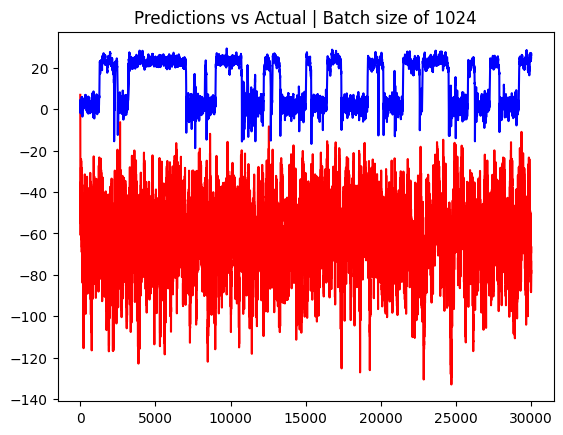

No transitions detected in predictions with current bounds!


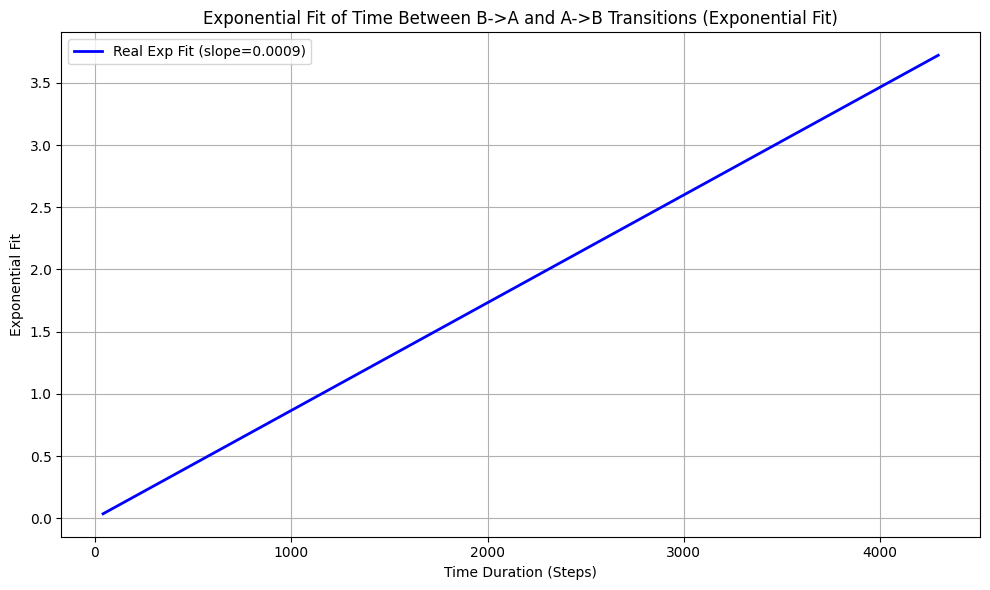

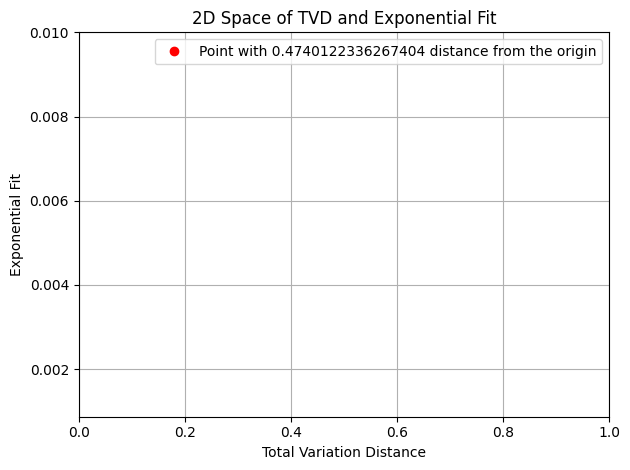

Epoch 7, 
                Reconstrunction Loss: 670.9610595703125,
                KL Divergence Loss: 257.7173156738281

                Validation Reconstrunction Loss: 1963.9833984375,
                Validation KL Divergence Loss: 643.5005493164062
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


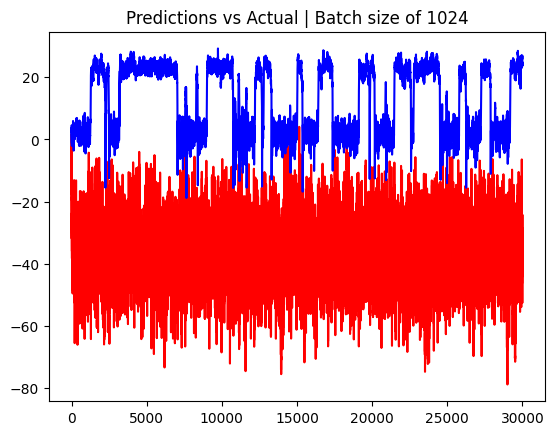

No transitions detected in predictions with current bounds!


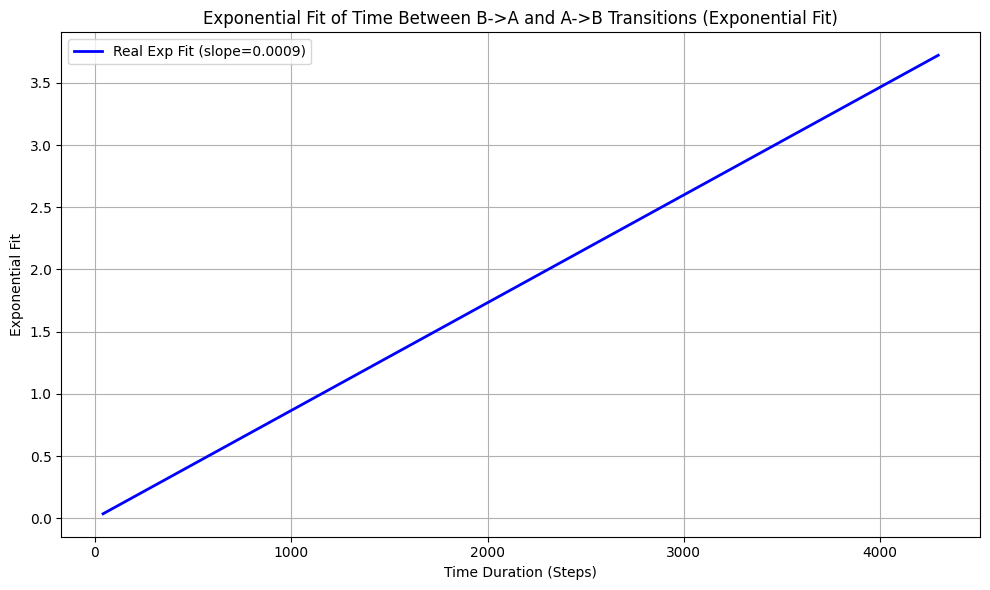

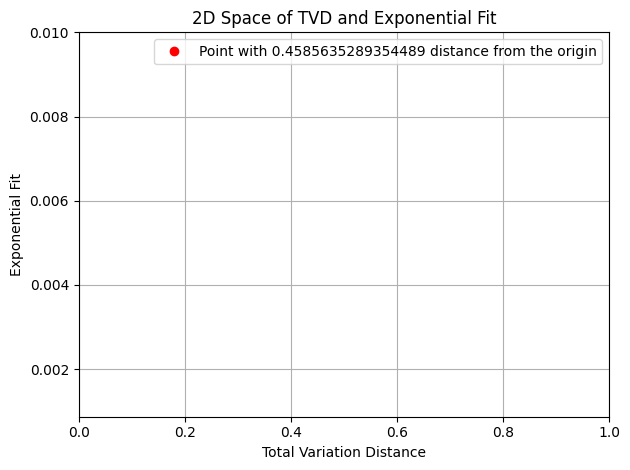

Epoch 8, 
                Reconstrunction Loss: 214.04446411132812,
                KL Divergence Loss: 198.48260498046875

                Validation Reconstrunction Loss: 743.8253173828125,
                Validation KL Divergence Loss: 475.35577392578125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


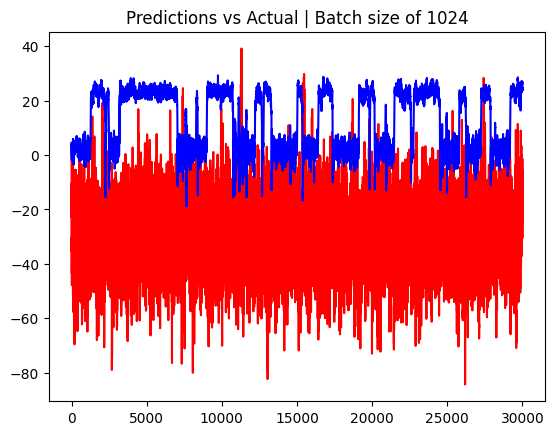

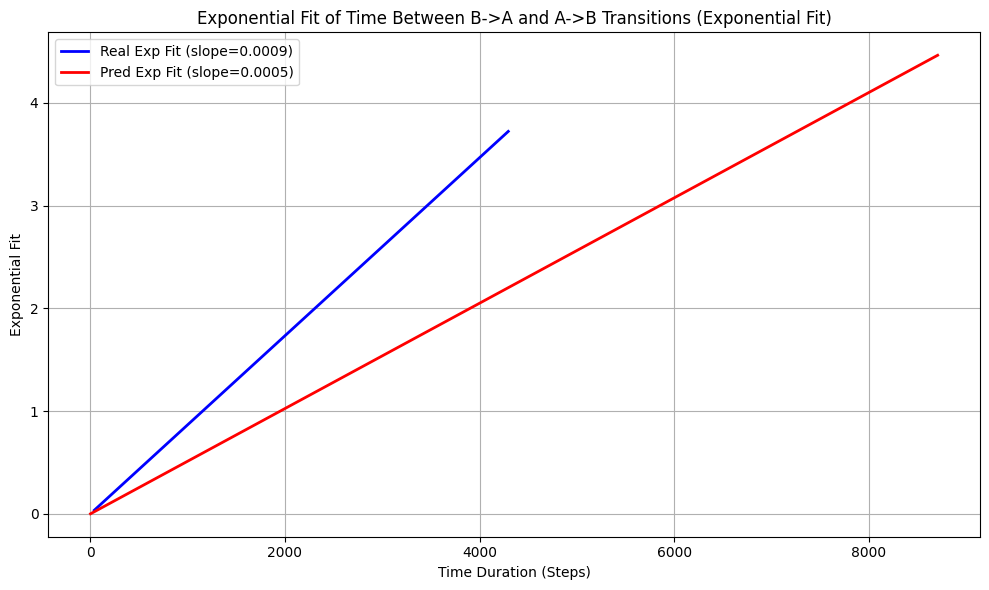

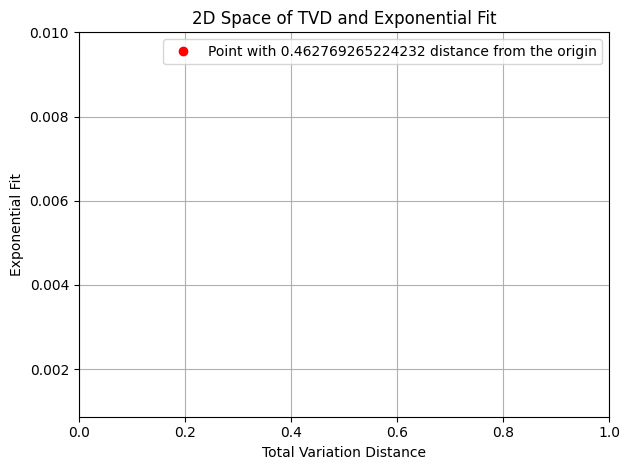

Epoch 9, 
                Reconstrunction Loss: 300.4185791015625,
                KL Divergence Loss: 176.84701538085938

                Validation Reconstrunction Loss: 1052.495361328125,
                Validation KL Divergence Loss: 423.8497314453125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


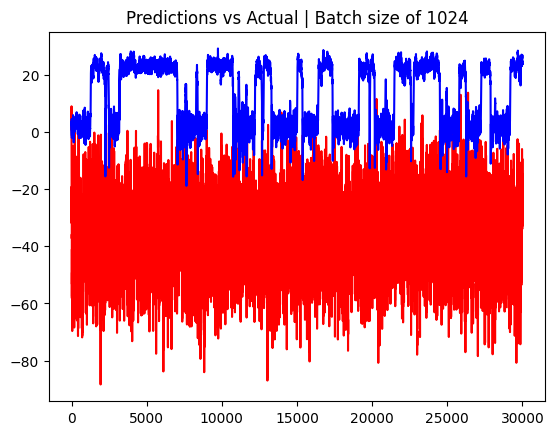

No transitions detected in predictions with current bounds!


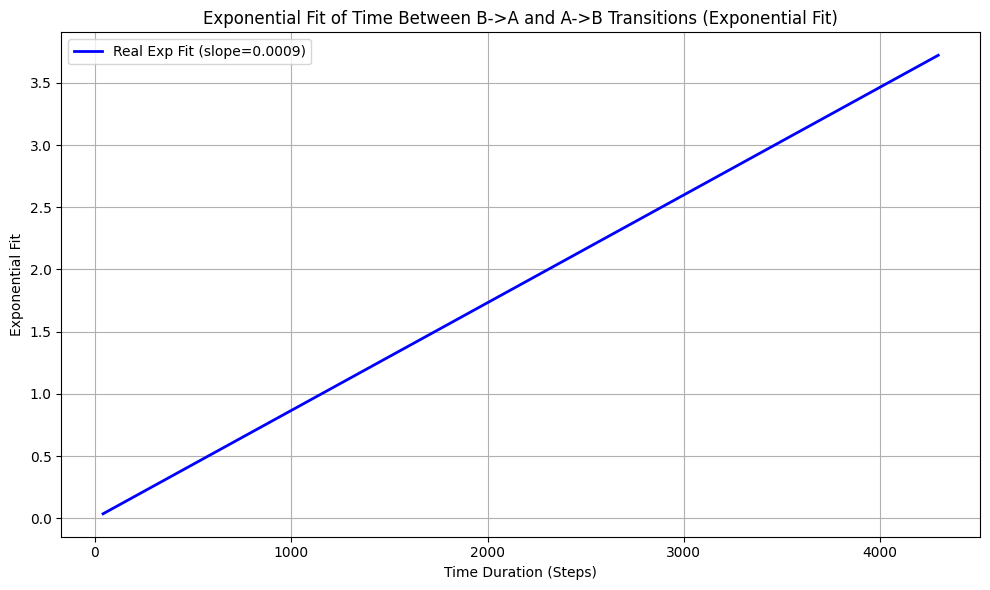

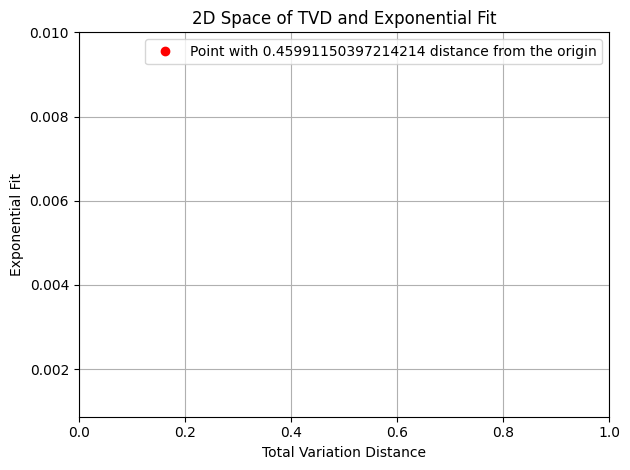

Epoch 10, 
                Reconstrunction Loss: 245.4634246826172,
                KL Divergence Loss: 154.27865600585938

                Validation Reconstrunction Loss: 1075.034912109375,
                Validation KL Divergence Loss: 376.8265380859375
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


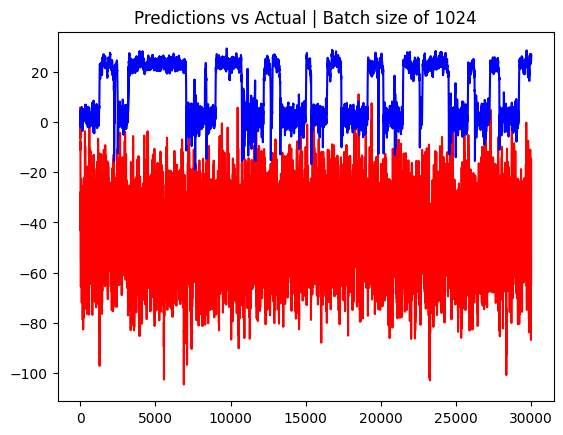

No transitions detected in predictions with current bounds!


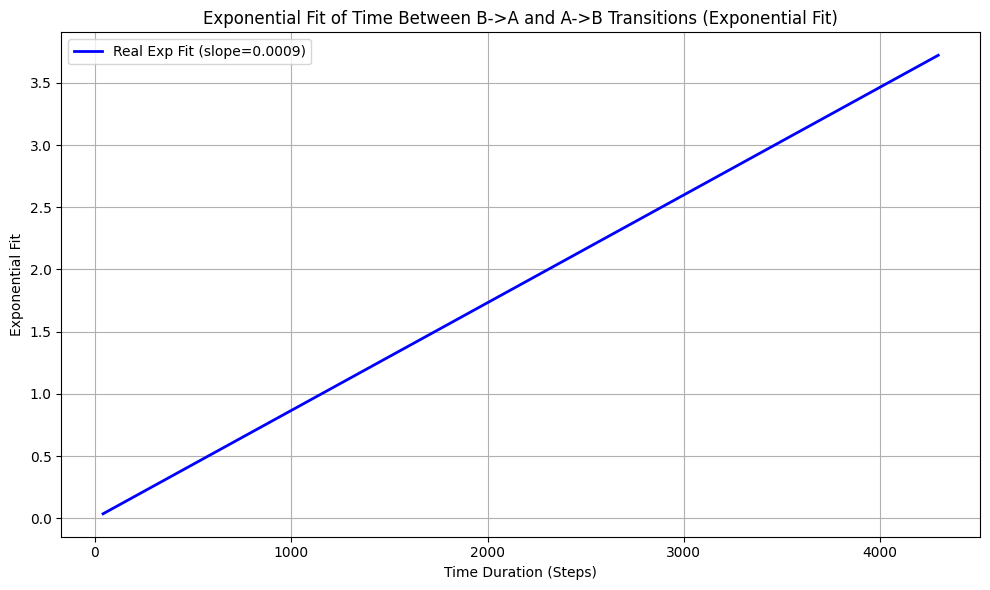

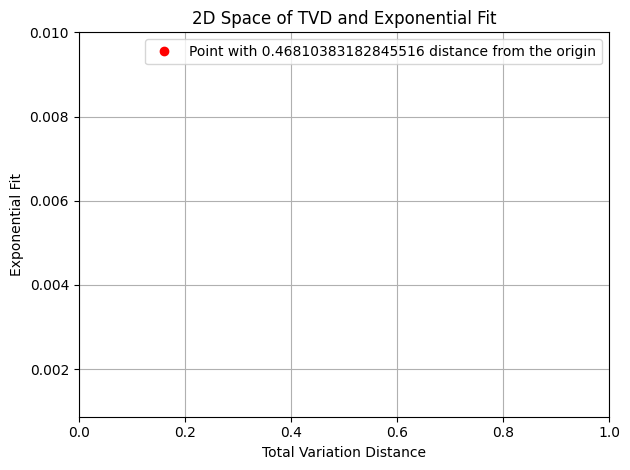

Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_2/timeseries
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_2/expo_fit
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_2/2D
Epoch 1, 
                Reconstrunction Loss: 748.24169921875,
                KL Divergence Loss: 1518.77392578125

                Validation Reconstrunction Loss: 1792.453857421875,
                Validation KL Divergence Loss: 3955.65185546875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


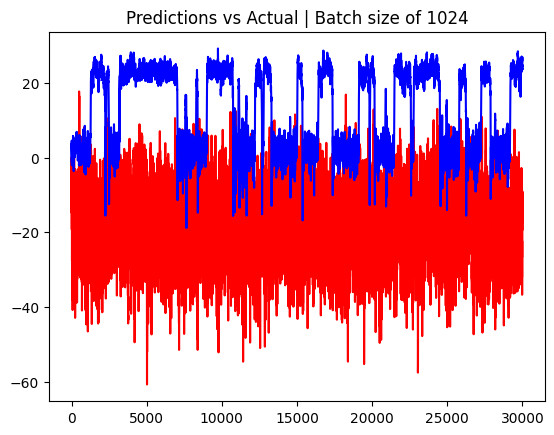

No transitions detected in predictions with current bounds!


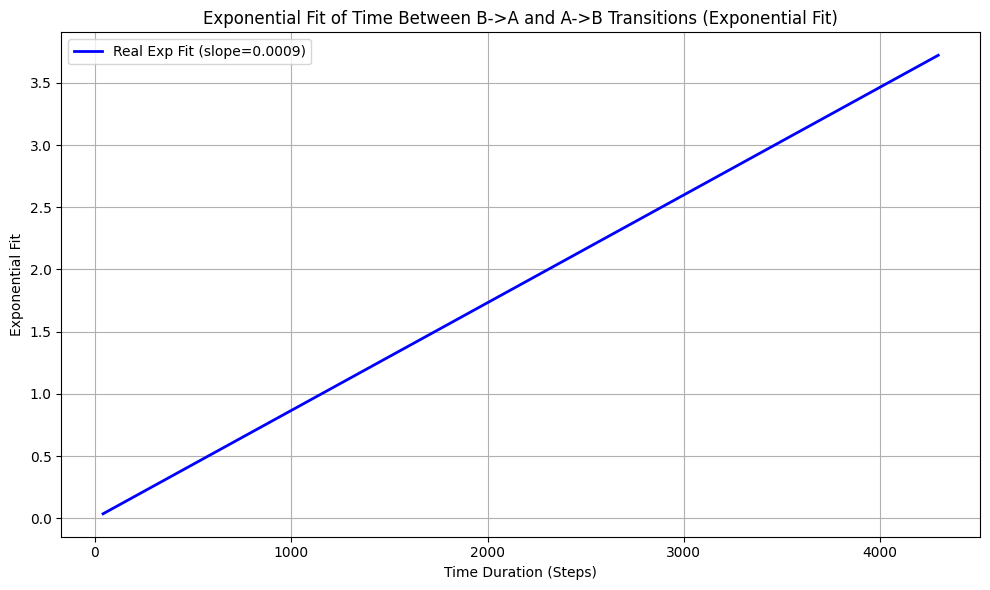

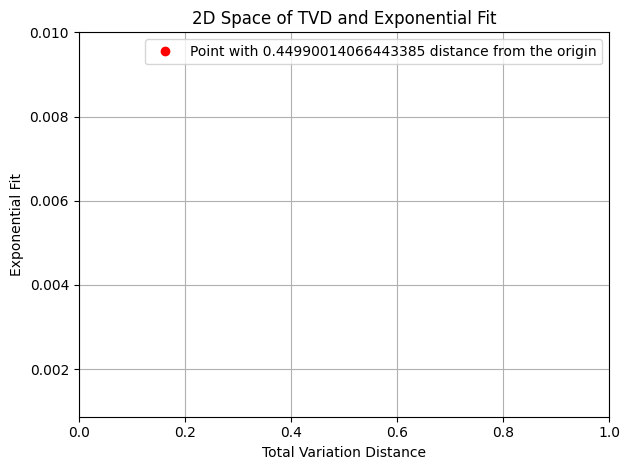

Epoch 2, 
                Reconstrunction Loss: 686.32958984375,
                KL Divergence Loss: 781.908447265625

                Validation Reconstrunction Loss: 1692.0147705078125,
                Validation KL Divergence Loss: 1911.3538818359375
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


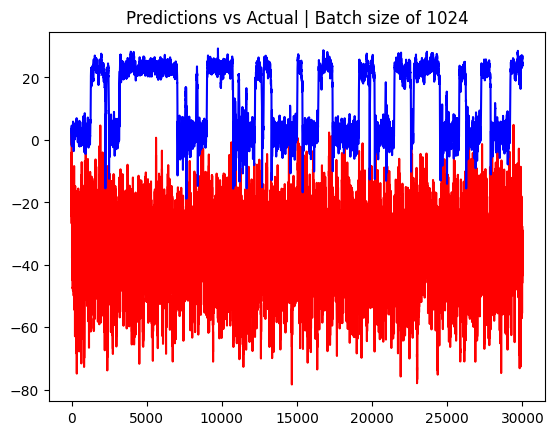

No transitions detected in predictions with current bounds!


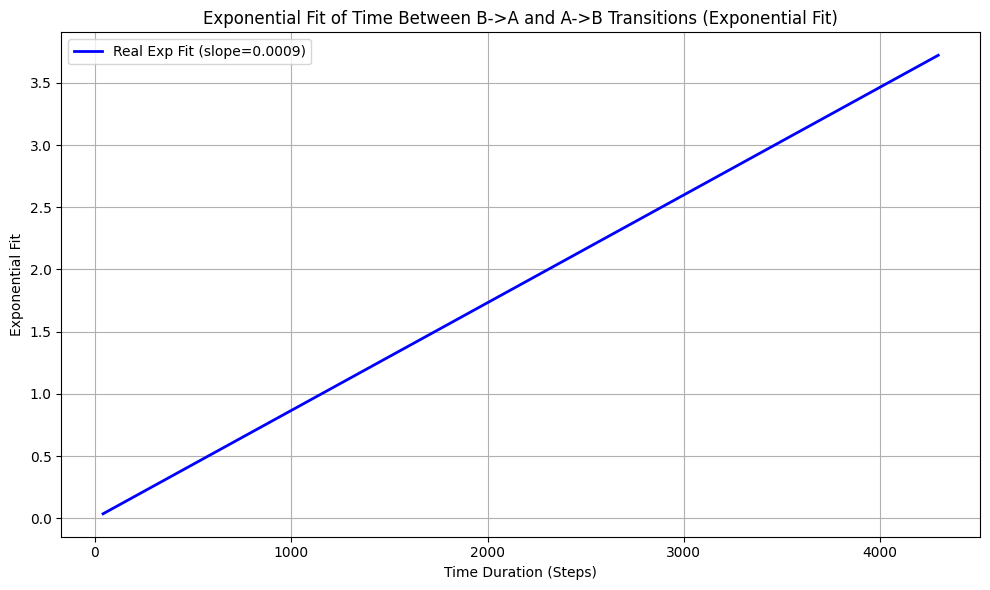

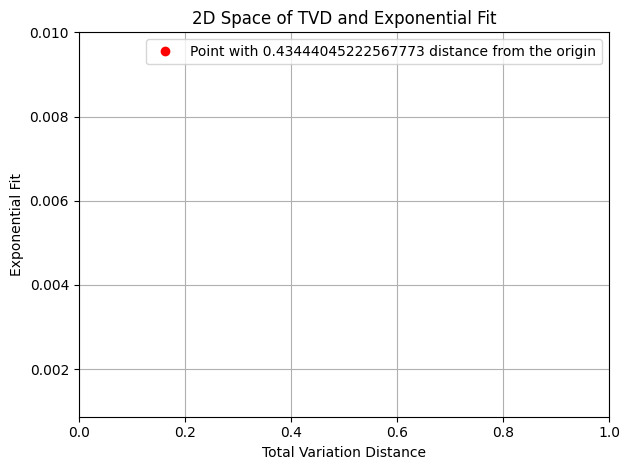

Epoch 3, 
                Reconstrunction Loss: 707.7604370117188,
                KL Divergence Loss: 552.0067138671875

                Validation Reconstrunction Loss: 1714.9052734375,
                Validation KL Divergence Loss: 1339.47607421875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


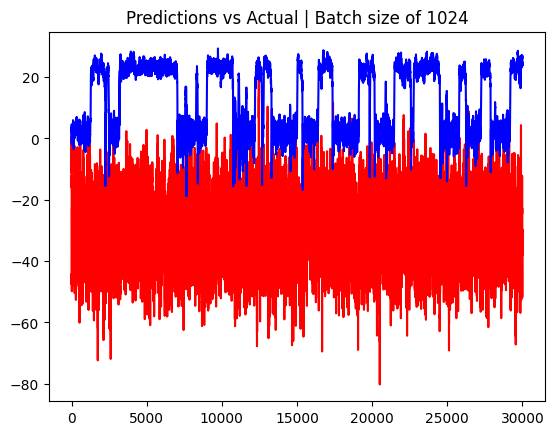

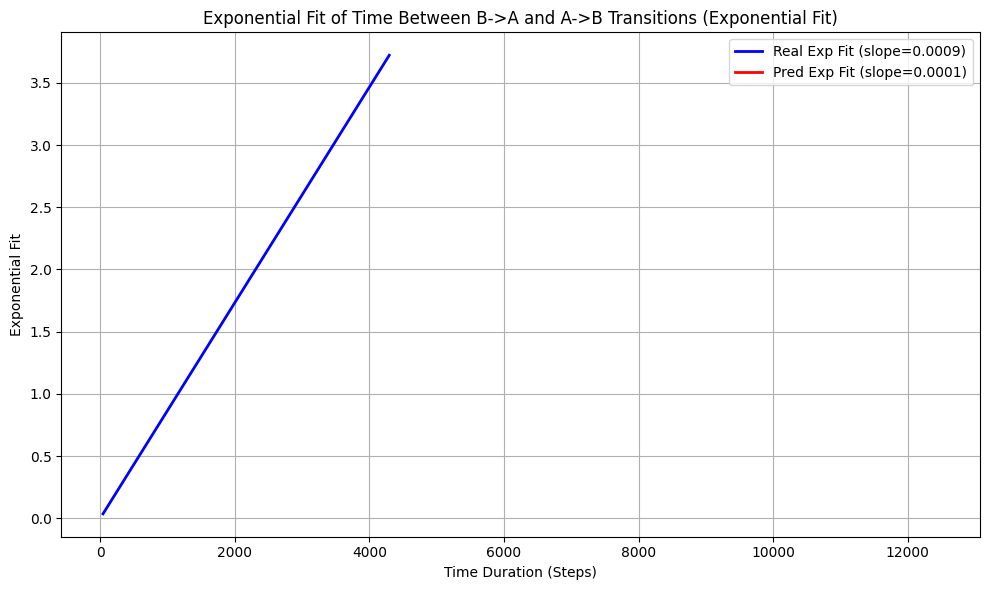

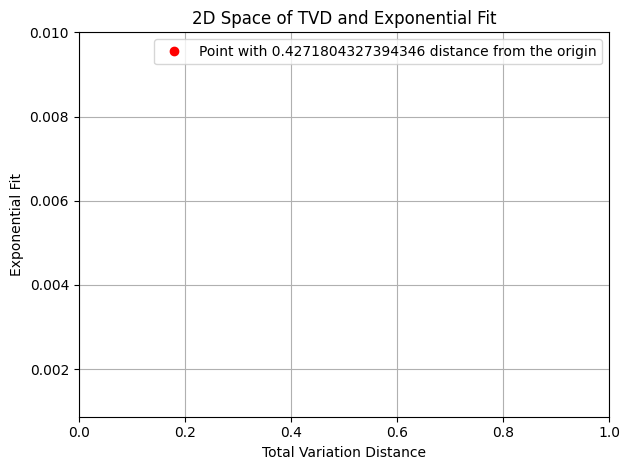

Epoch 4, 
                Reconstrunction Loss: 301.59295654296875,
                KL Divergence Loss: 398.1289367675781

                Validation Reconstrunction Loss: 752.90673828125,
                Validation KL Divergence Loss: 946.2113647460938
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


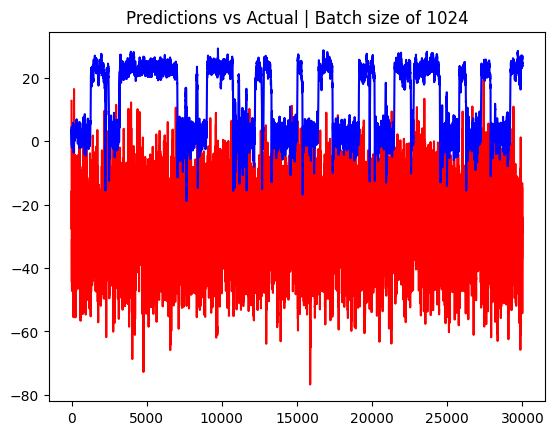

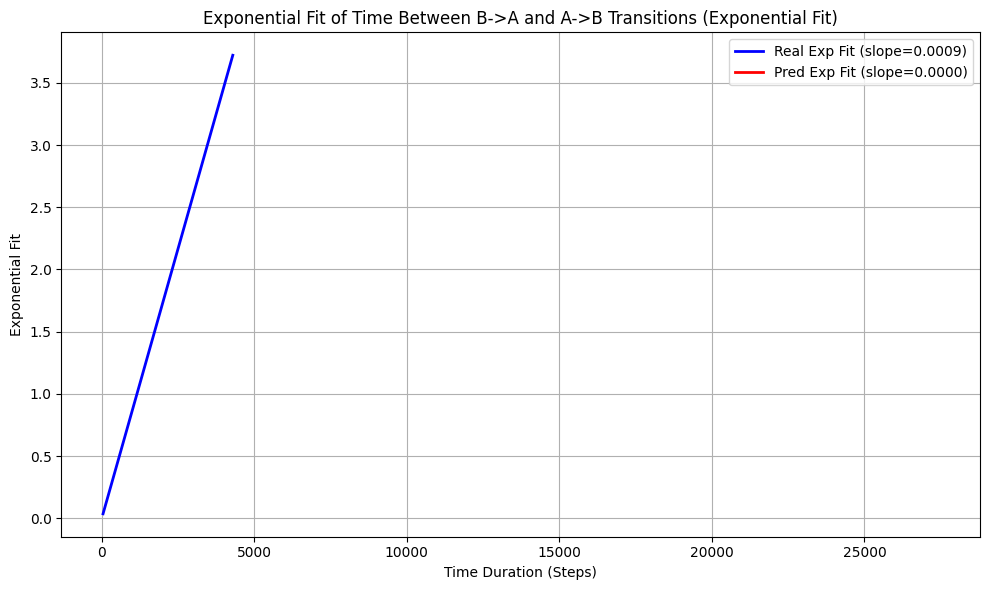

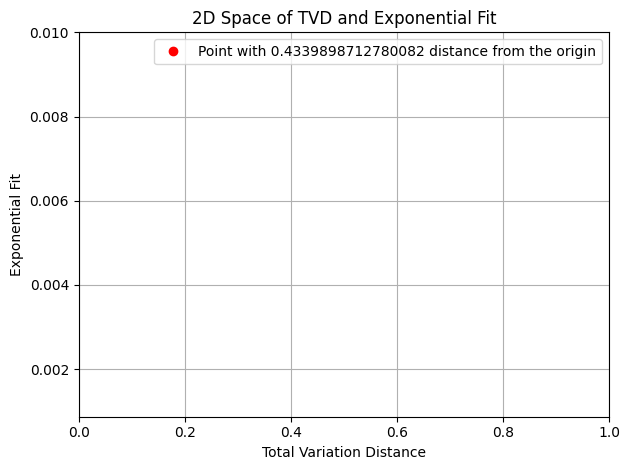

Epoch 5, 
                Reconstrunction Loss: 217.626220703125,
                KL Divergence Loss: 317.9998779296875

                Validation Reconstrunction Loss: 639.8692626953125,
                Validation KL Divergence Loss: 749.8458862304688
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


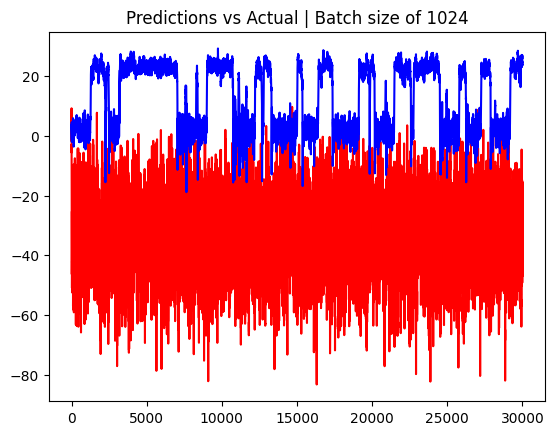

No transitions detected in predictions with current bounds!


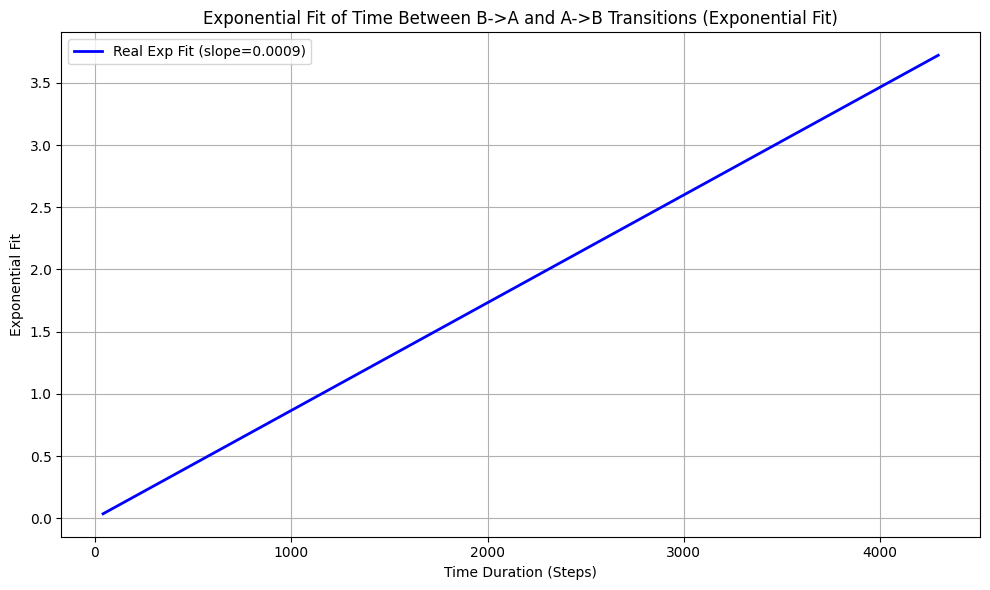

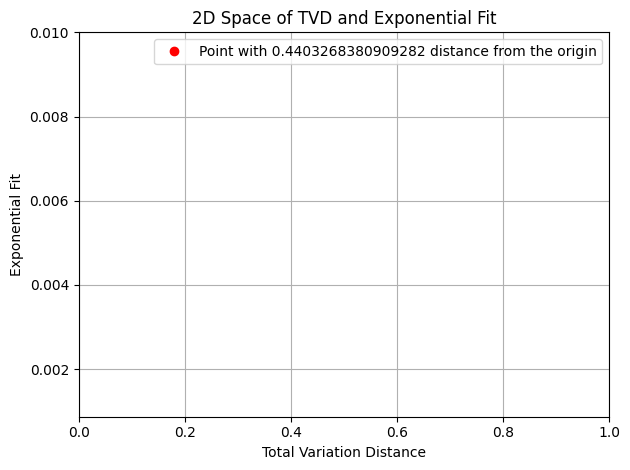

Epoch 6, 
                Reconstrunction Loss: 371.25726318359375,
                KL Divergence Loss: 264.2351989746094

                Validation Reconstrunction Loss: 954.8984375,
                Validation KL Divergence Loss: 621.3397216796875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


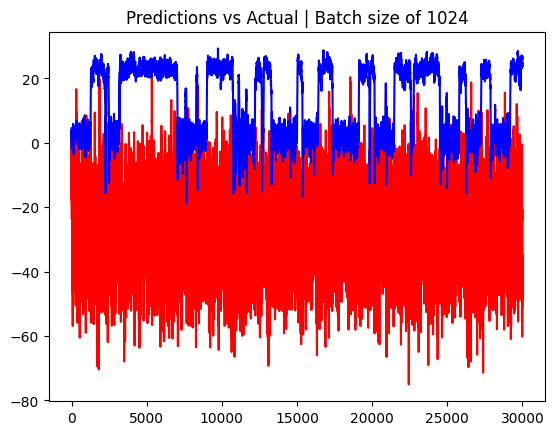

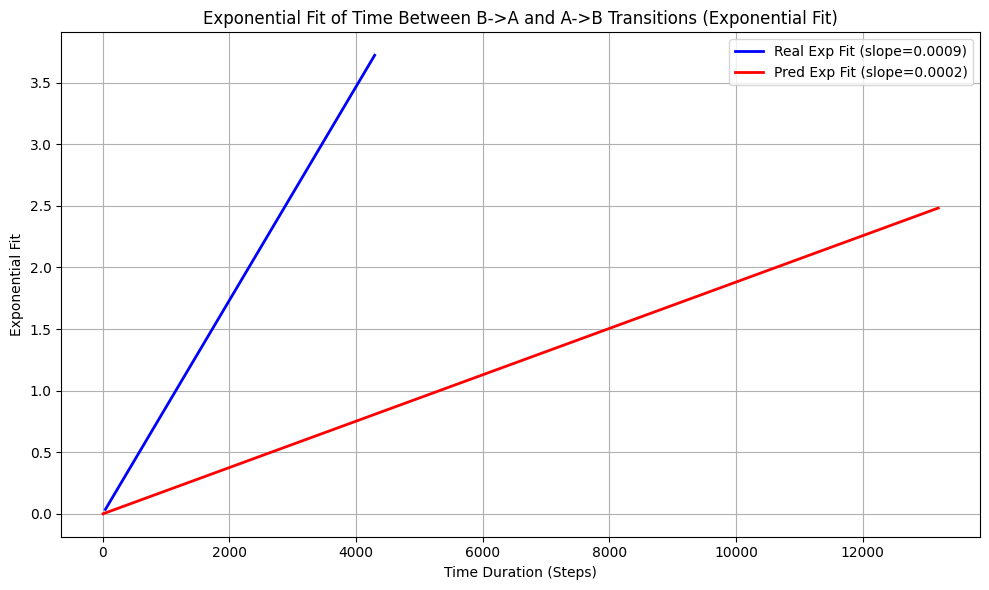

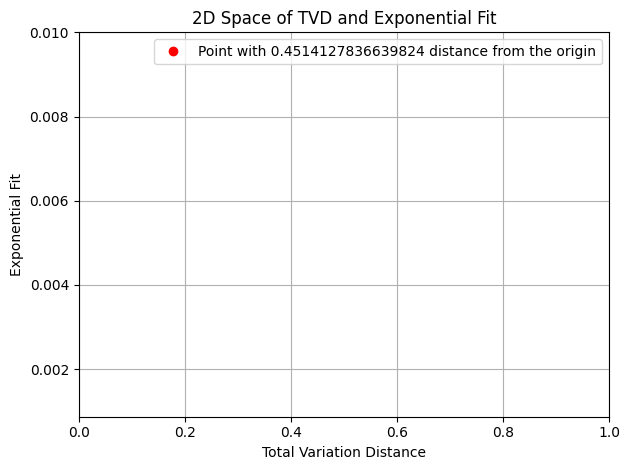

Epoch 7, 
                Reconstrunction Loss: 268.0155334472656,
                KL Divergence Loss: 223.65921020507812

                Validation Reconstrunction Loss: 822.6828002929688,
                Validation KL Divergence Loss: 524.6929321289062
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


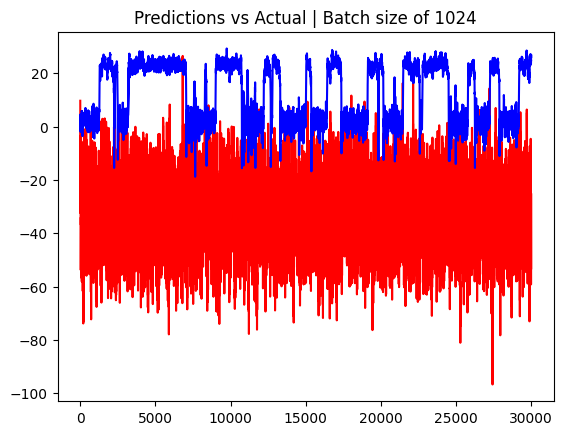

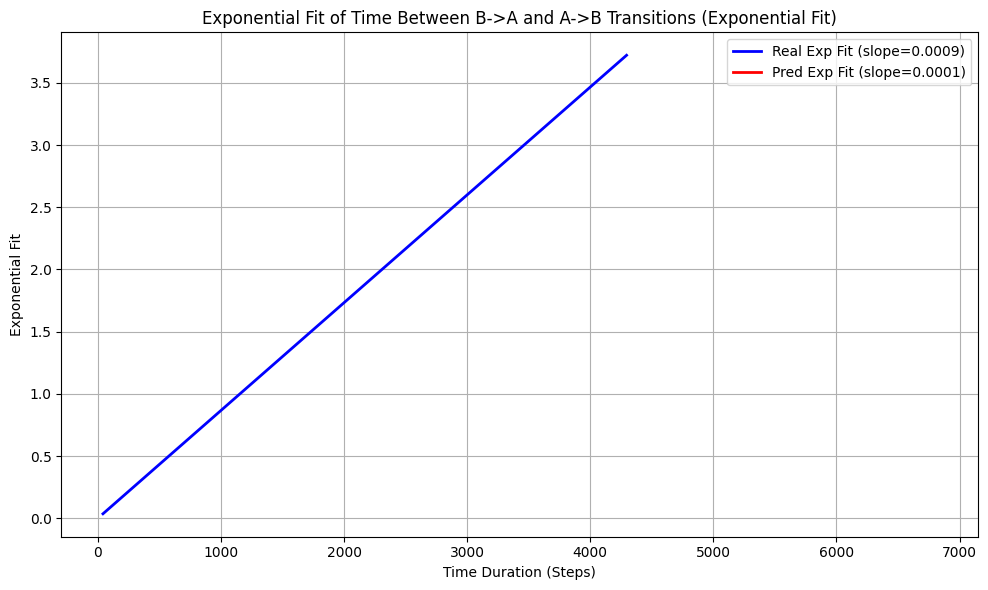

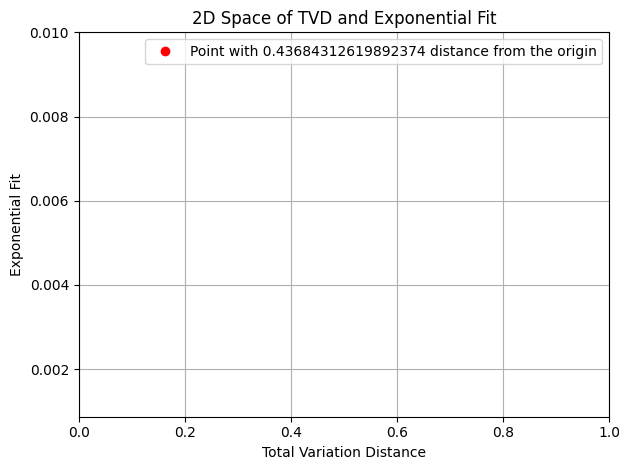

Epoch 8, 
                Reconstrunction Loss: 159.2618408203125,
                KL Divergence Loss: 190.3230743408203

                Validation Reconstrunction Loss: 502.90081787109375,
                Validation KL Divergence Loss: 445.31170654296875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


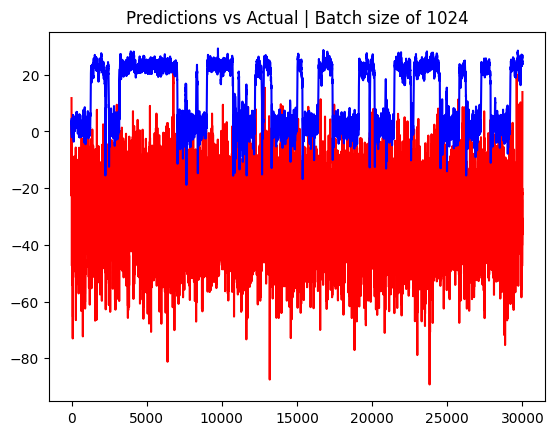

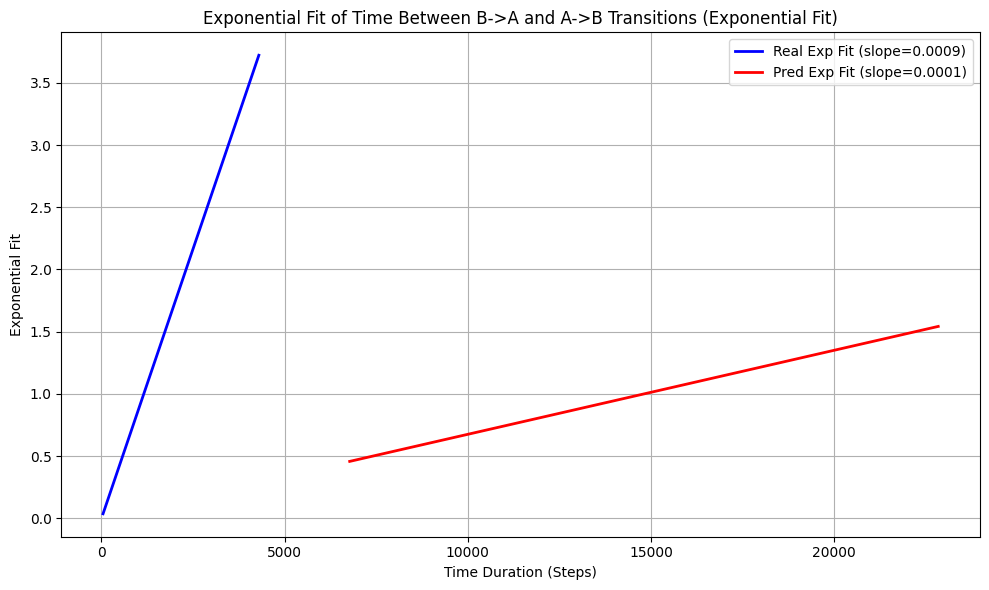

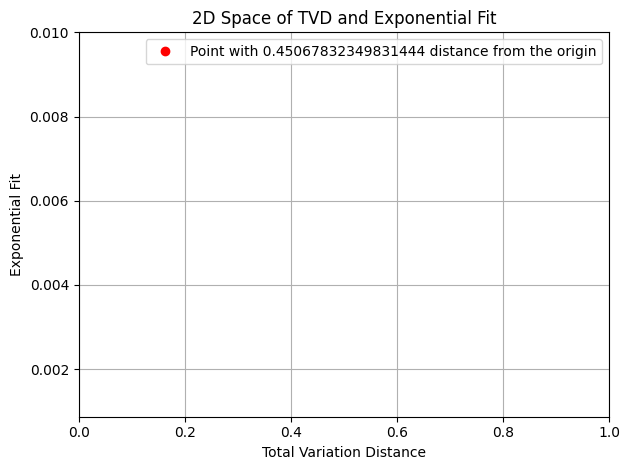

Epoch 9, 
                Reconstrunction Loss: 178.18438720703125,
                KL Divergence Loss: 166.1720733642578

                Validation Reconstrunction Loss: 613.7791748046875,
                Validation KL Divergence Loss: 388.60675048828125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


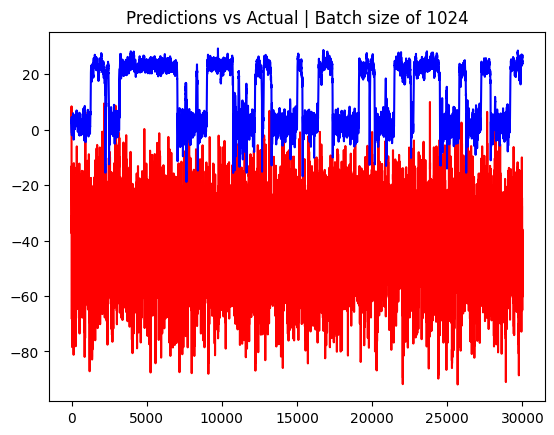

No transitions detected in predictions with current bounds!


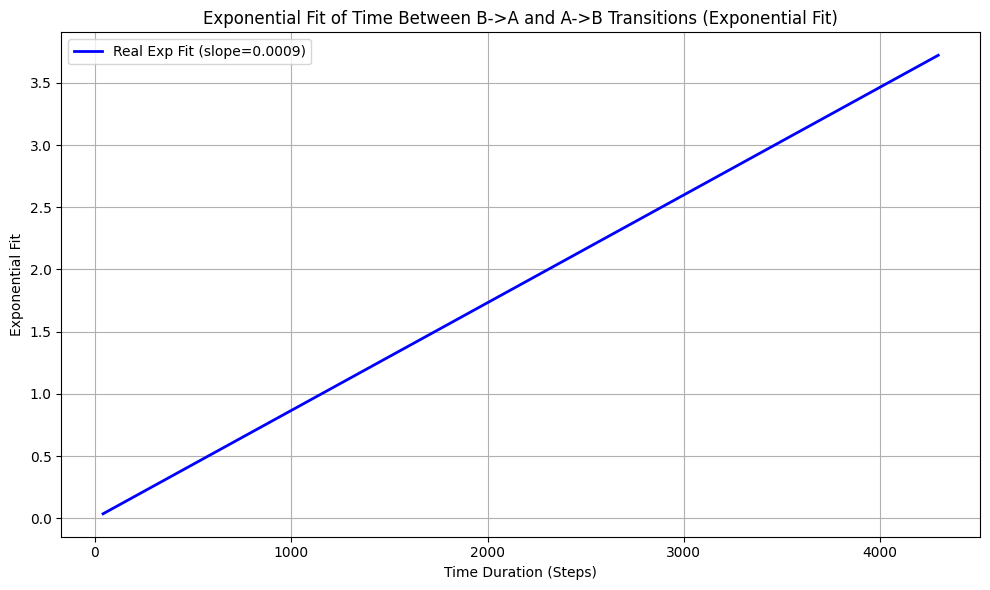

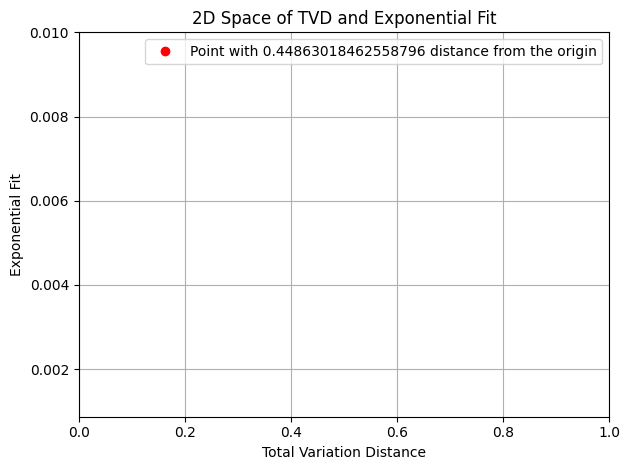

Epoch 10, 
                Reconstrunction Loss: 158.03250122070312,
                KL Divergence Loss: 146.01593017578125

                Validation Reconstrunction Loss: 524.806640625,
                Validation KL Divergence Loss: 340.3223876953125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


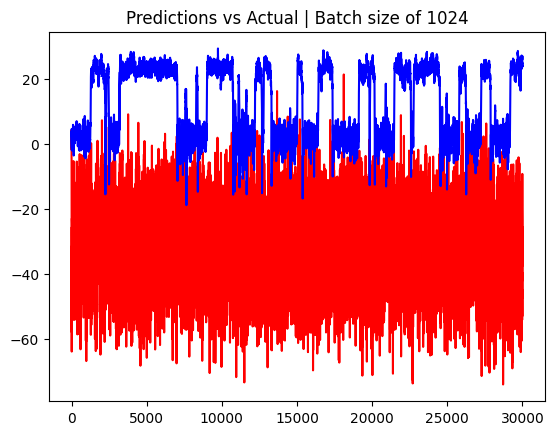

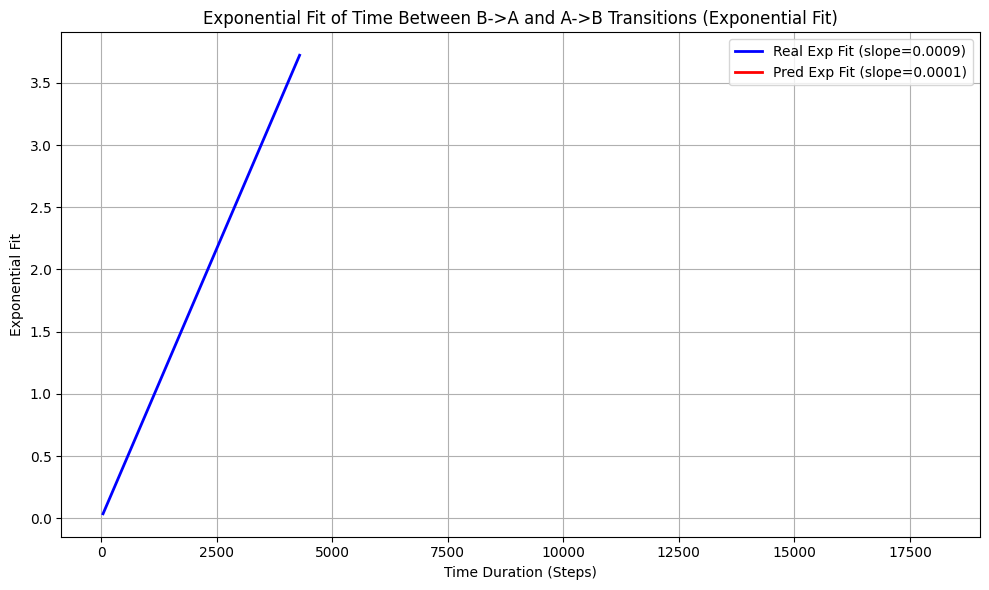

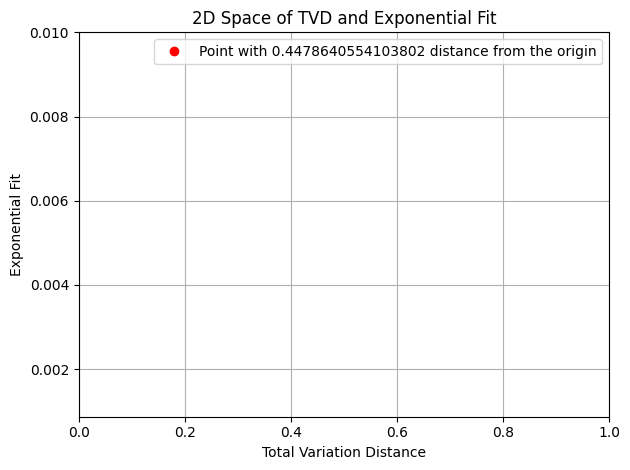

Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_3/timeseries
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_3/expo_fit
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_3/2D
Epoch 1, 
                Reconstrunction Loss: 713.4044189453125,
                KL Divergence Loss: 1581.4669189453125

                Validation Reconstrunction Loss: 1700.3243408203125,
                Validation KL Divergence Loss: 4136.28125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


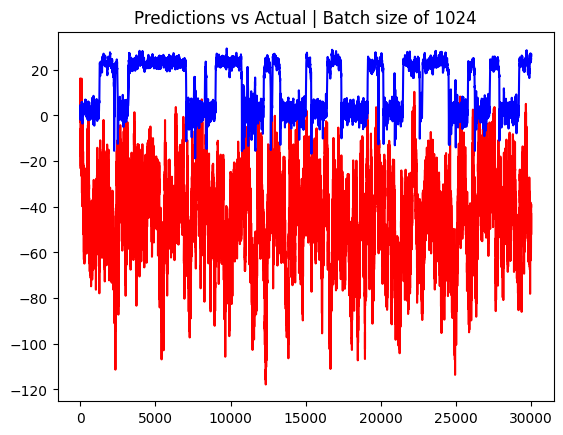

No transitions detected in predictions with current bounds!


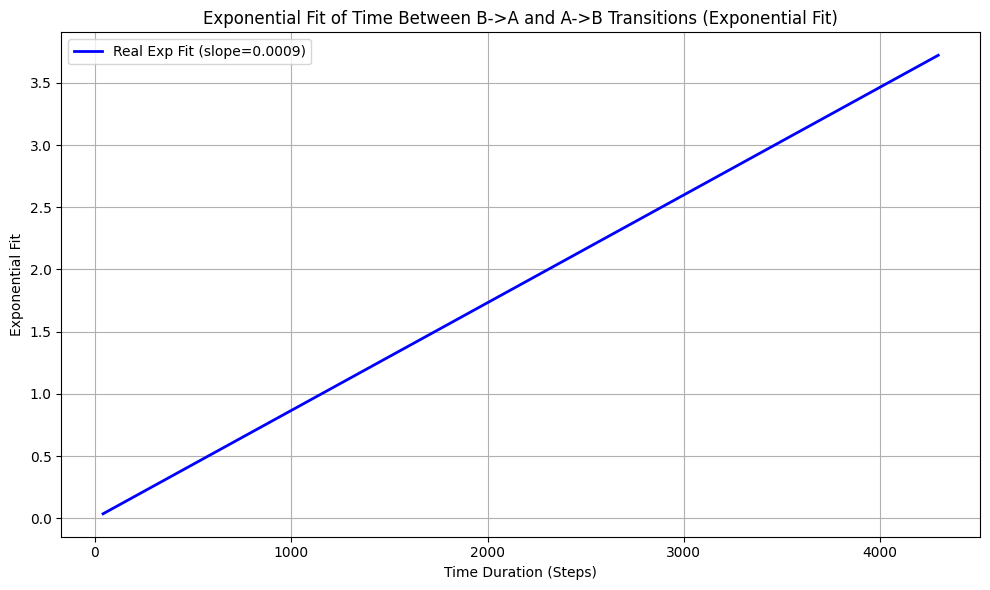

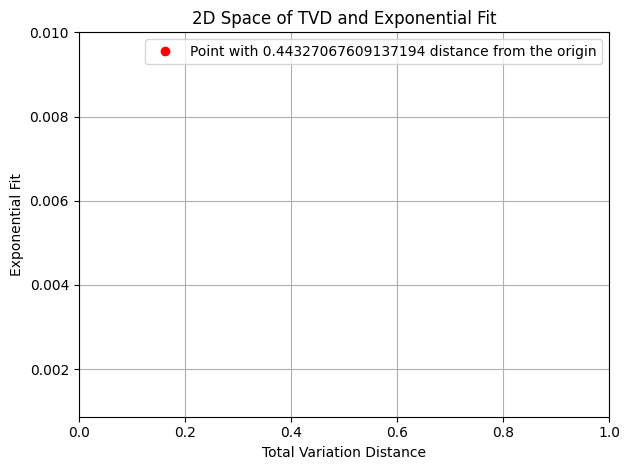

Epoch 2, 
                Reconstrunction Loss: 709.414794921875,
                KL Divergence Loss: 812.731689453125

                Validation Reconstrunction Loss: 2522.15771484375,
                Validation KL Divergence Loss: 2025.265869140625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


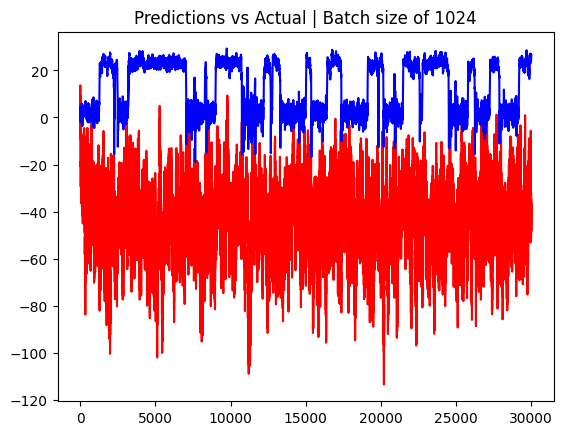

No transitions detected in predictions with current bounds!


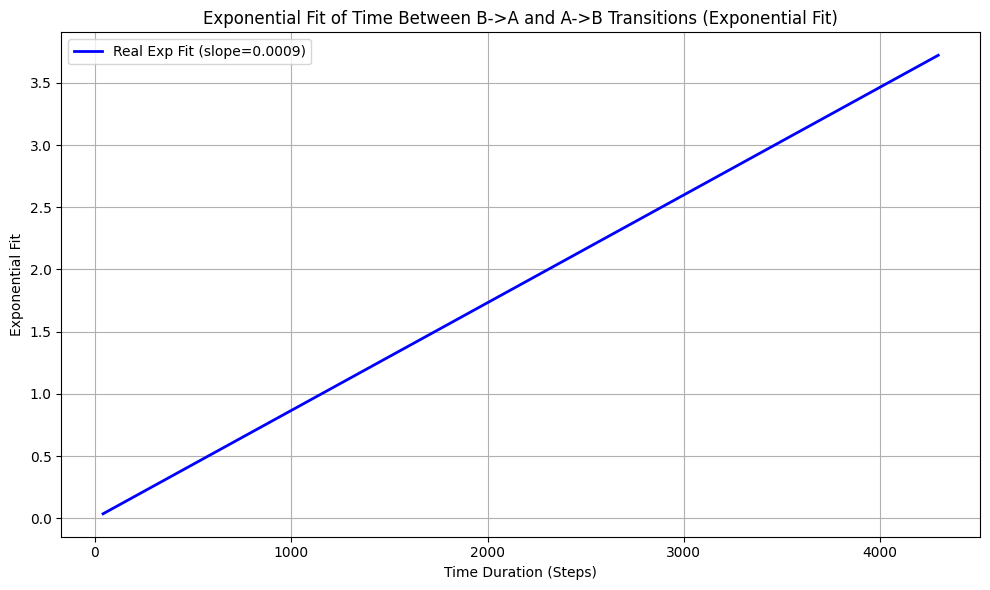

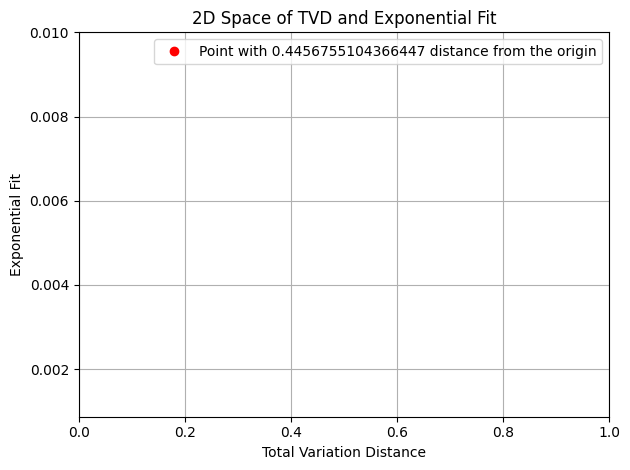

Epoch 3, 
                Reconstrunction Loss: 287.0194091796875,
                KL Divergence Loss: 547.1116333007812

                Validation Reconstrunction Loss: 734.3409423828125,
                Validation KL Divergence Loss: 1321.3045654296875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


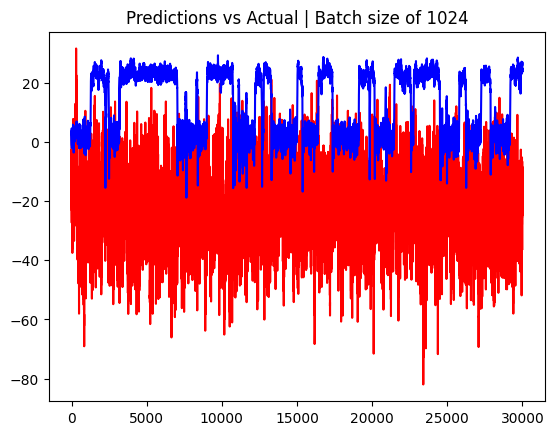

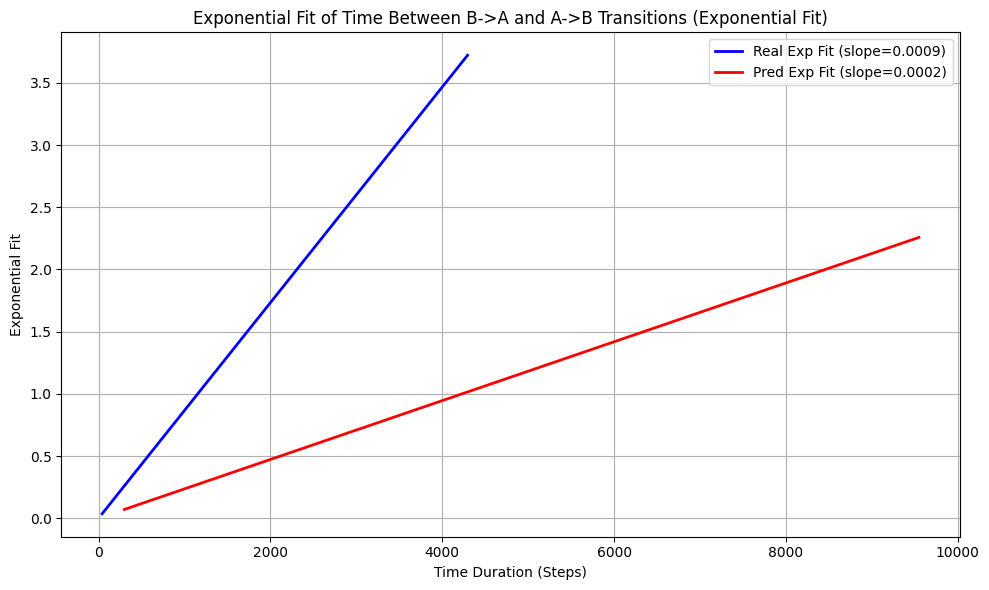

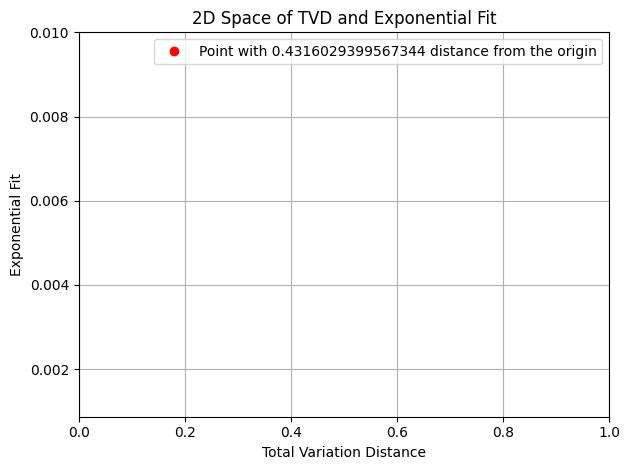

Epoch 4, 
                Reconstrunction Loss: 605.0885009765625,
                KL Divergence Loss: 421.9012451171875

                Validation Reconstrunction Loss: 1266.5467529296875,
                Validation KL Divergence Loss: 1012.7891845703125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


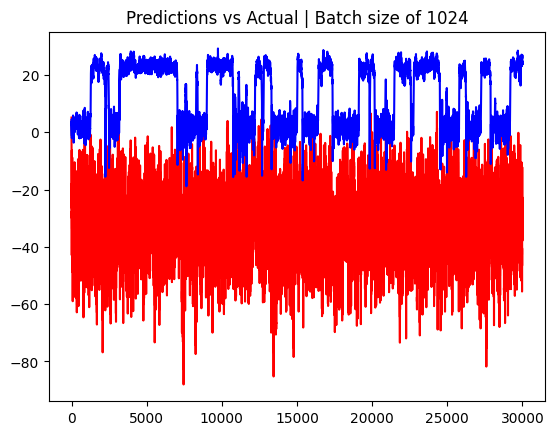

No transitions detected in predictions with current bounds!


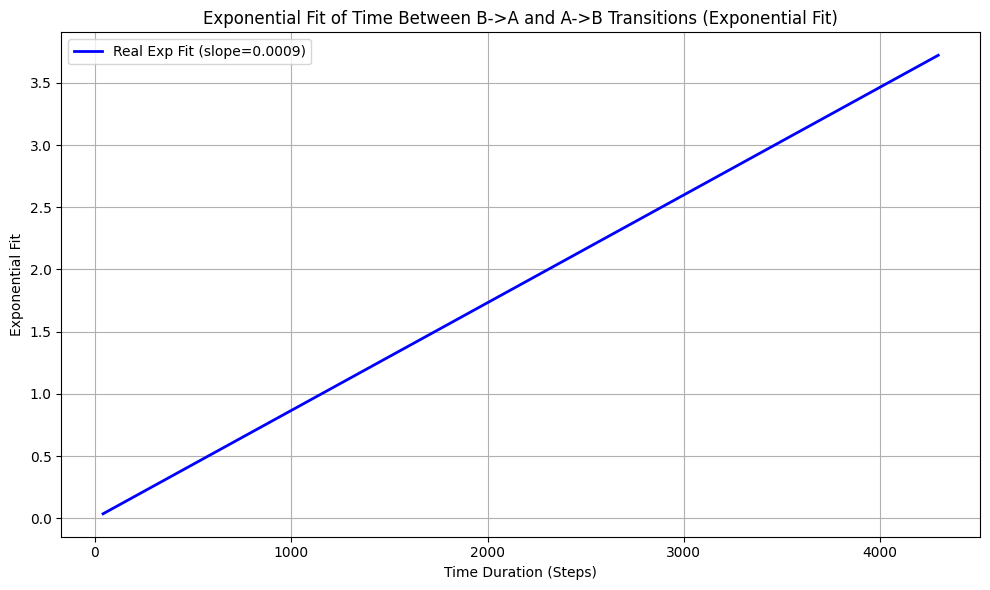

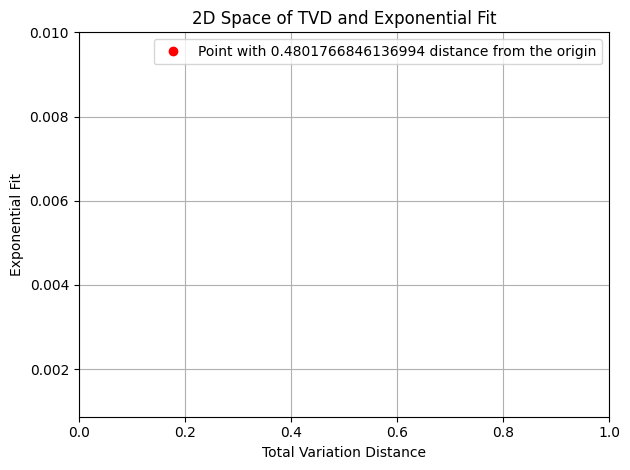

Epoch 5, 
                Reconstrunction Loss: 180.68682861328125,
                KL Divergence Loss: 329.3081970214844

                Validation Reconstrunction Loss: 482.03851318359375,
                Validation KL Divergence Loss: 781.8150634765625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


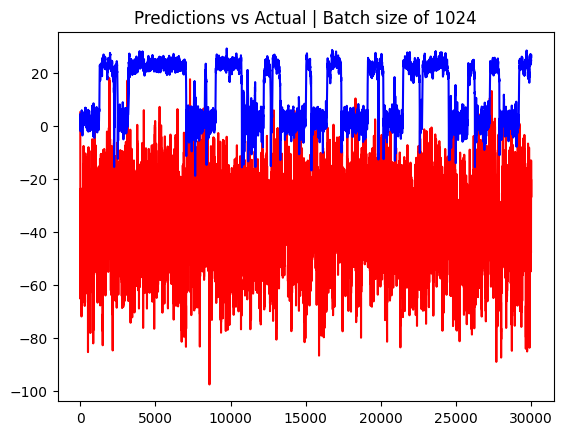

No transitions detected in predictions with current bounds!


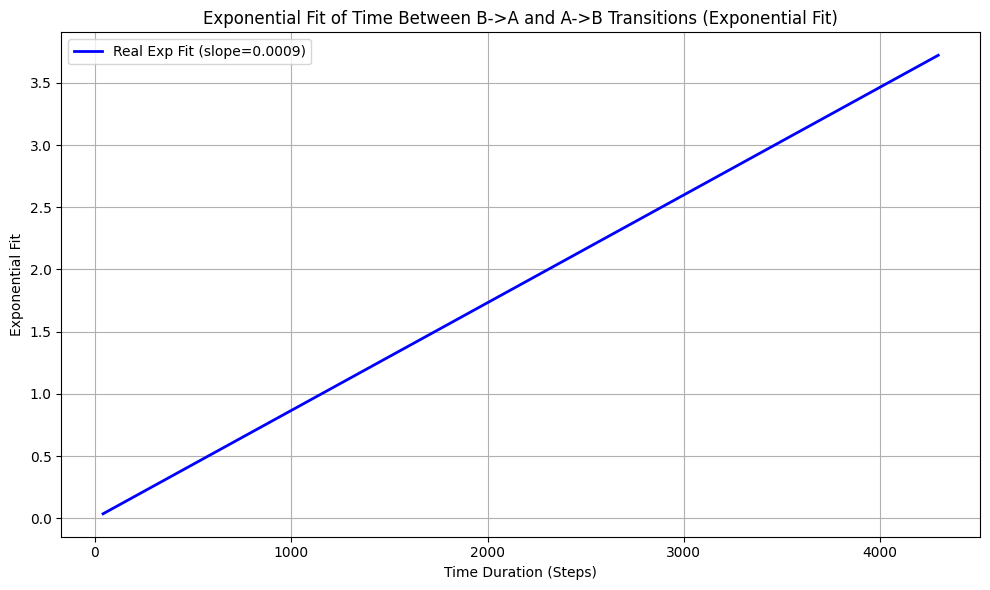

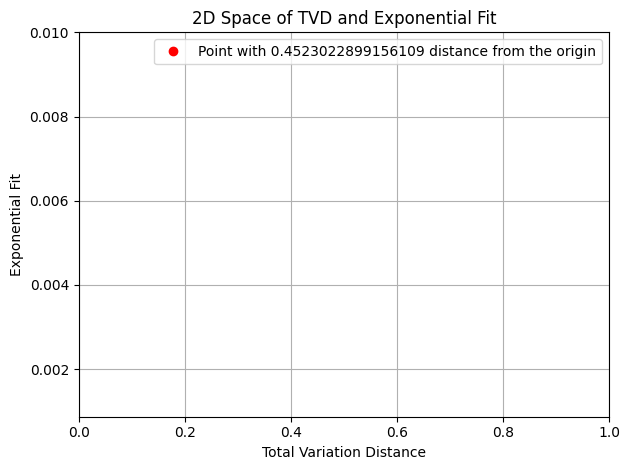

Epoch 6, 
                Reconstrunction Loss: 407.2074279785156,
                KL Divergence Loss: 289.792236328125

                Validation Reconstrunction Loss: 1348.116455078125,
                Validation KL Divergence Loss: 701.0230712890625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


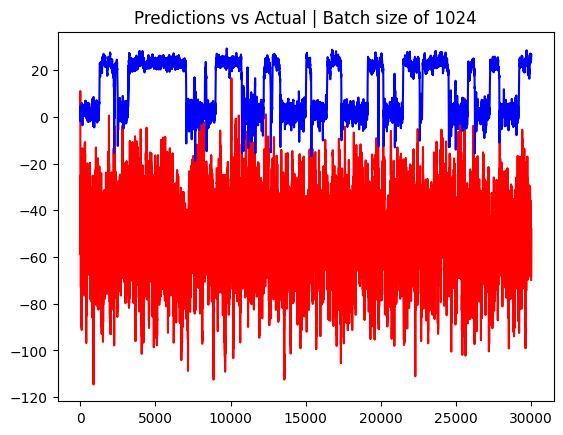

No transitions detected in predictions with current bounds!


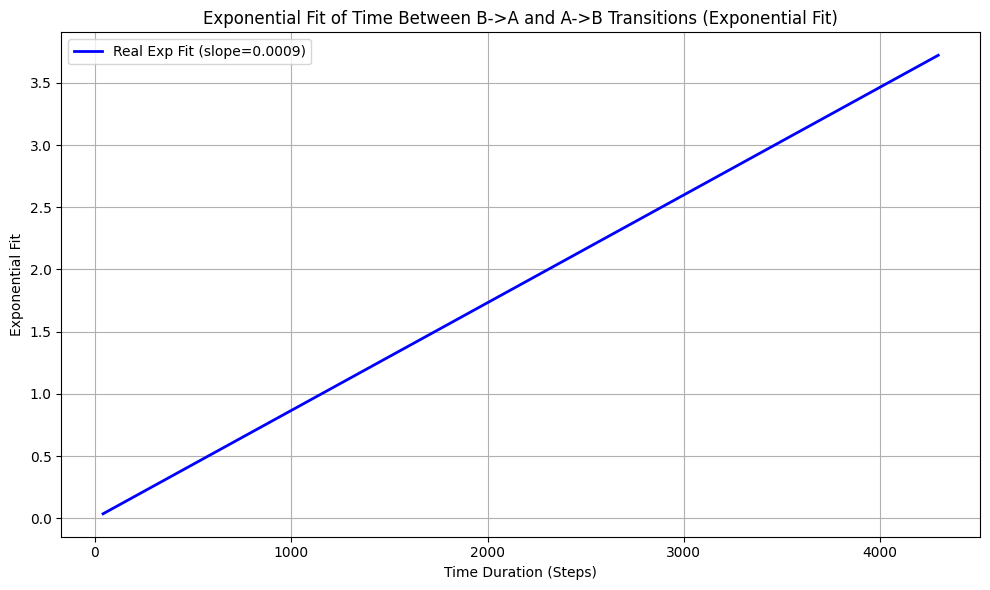

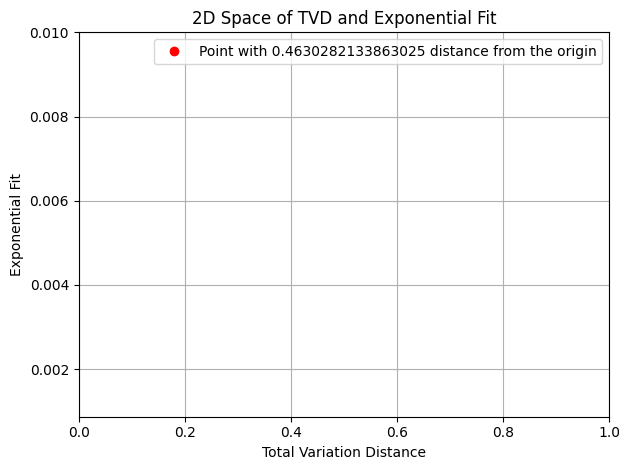

Epoch 7, 
                Reconstrunction Loss: 385.15618896484375,
                KL Divergence Loss: 246.0548095703125

                Validation Reconstrunction Loss: 1122.754150390625,
                Validation KL Divergence Loss: 597.2271728515625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


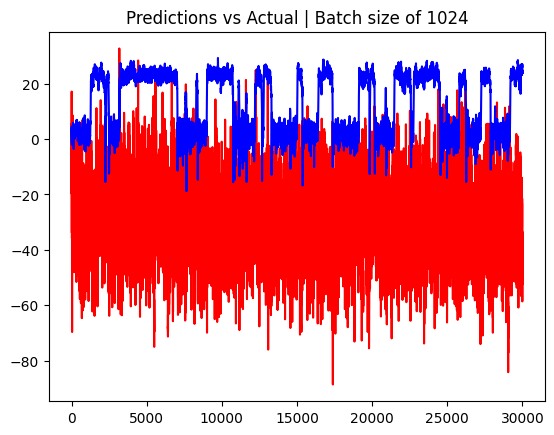

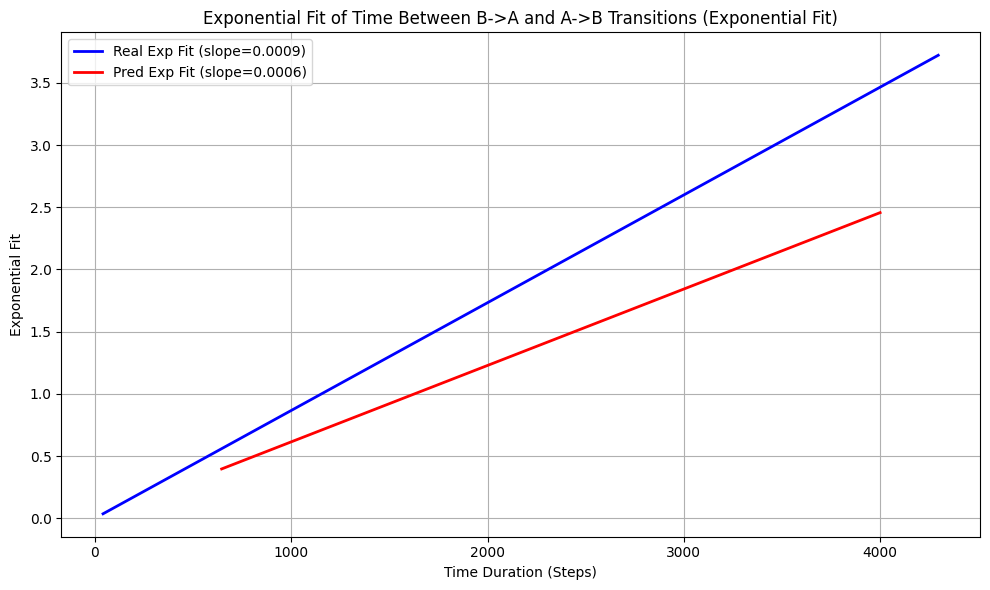

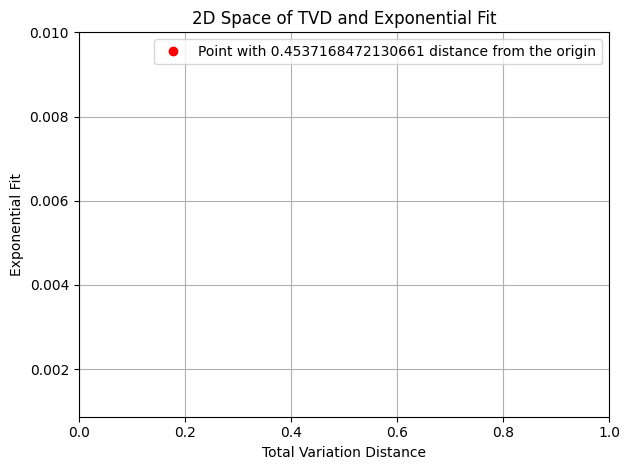

Epoch 8, 
                Reconstrunction Loss: 137.74537658691406,
                KL Divergence Loss: 196.89561462402344

                Validation Reconstrunction Loss: 477.445068359375,
                Validation KL Divergence Loss: 467.41156005859375
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


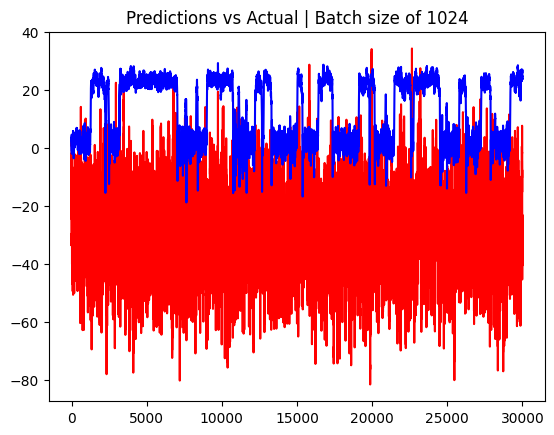

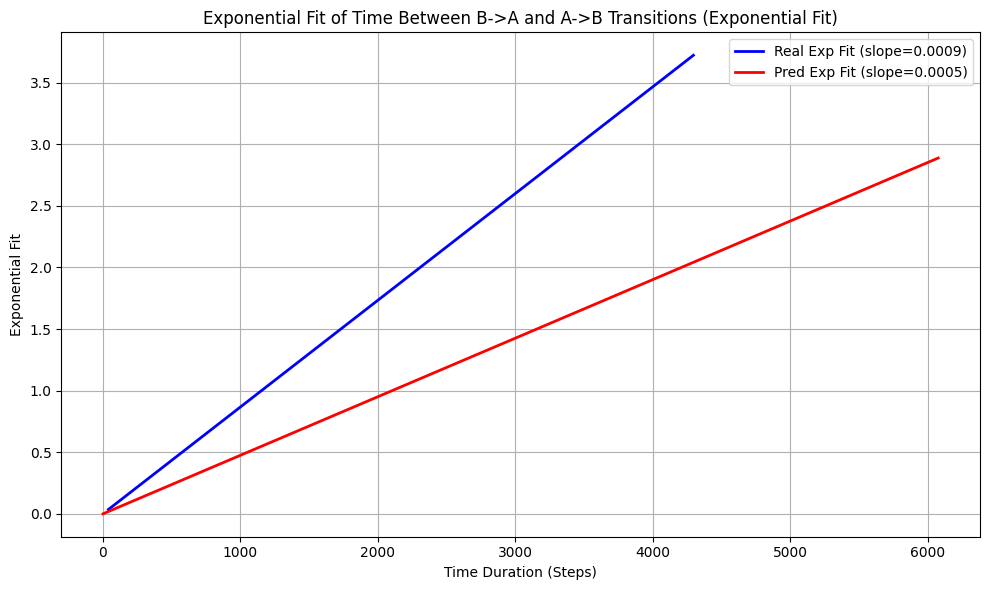

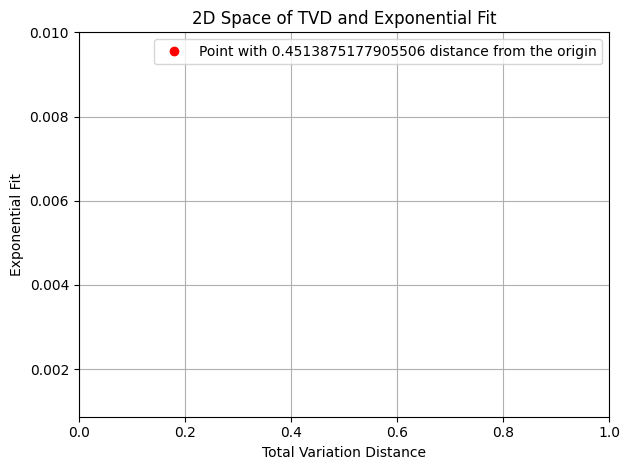

Epoch 9, 
                Reconstrunction Loss: 702.8668212890625,
                KL Divergence Loss: 196.93740844726562

                Validation Reconstrunction Loss: 1728.7537841796875,
                Validation KL Divergence Loss: 499.3320617675781
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


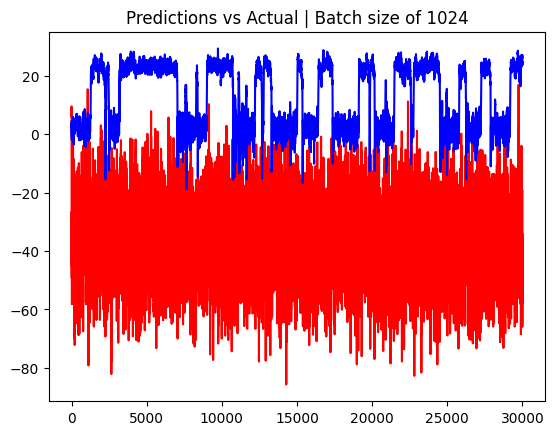

No transitions detected in predictions with current bounds!


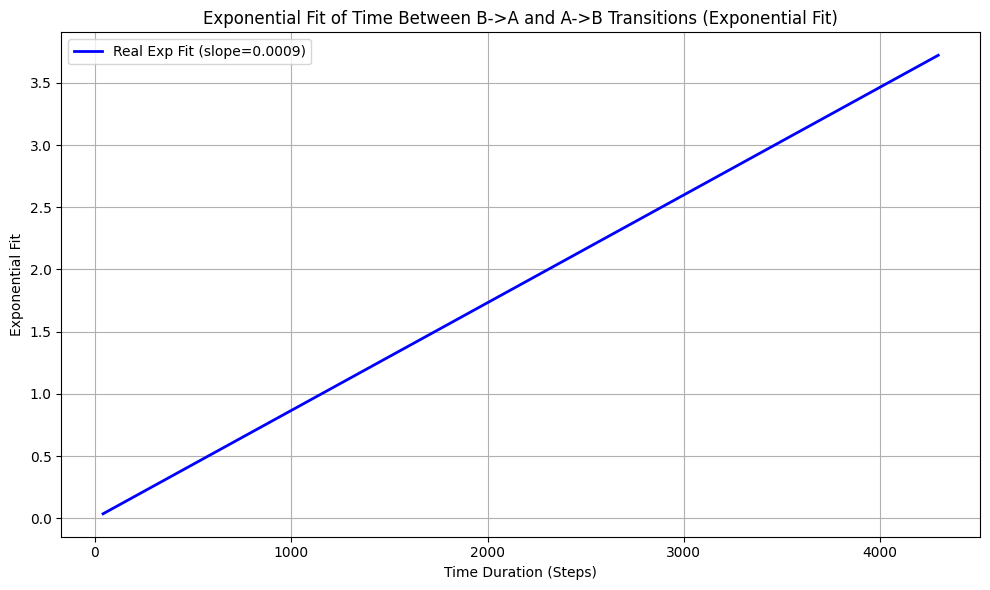

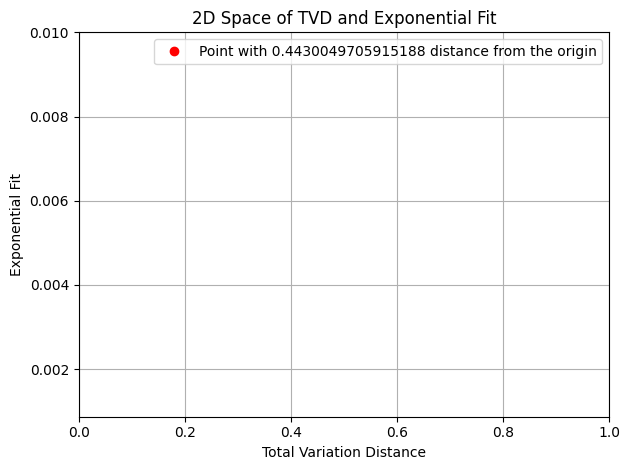

Epoch 10, 
                Reconstrunction Loss: 136.78814697265625,
                KL Divergence Loss: 150.08460998535156

                Validation Reconstrunction Loss: 352.8381652832031,
                Validation KL Divergence Loss: 355.22662353515625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


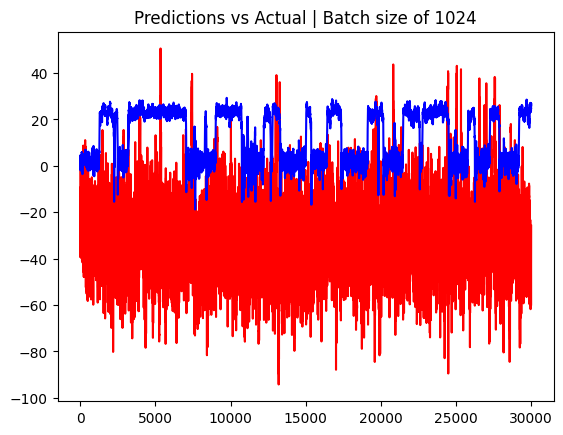

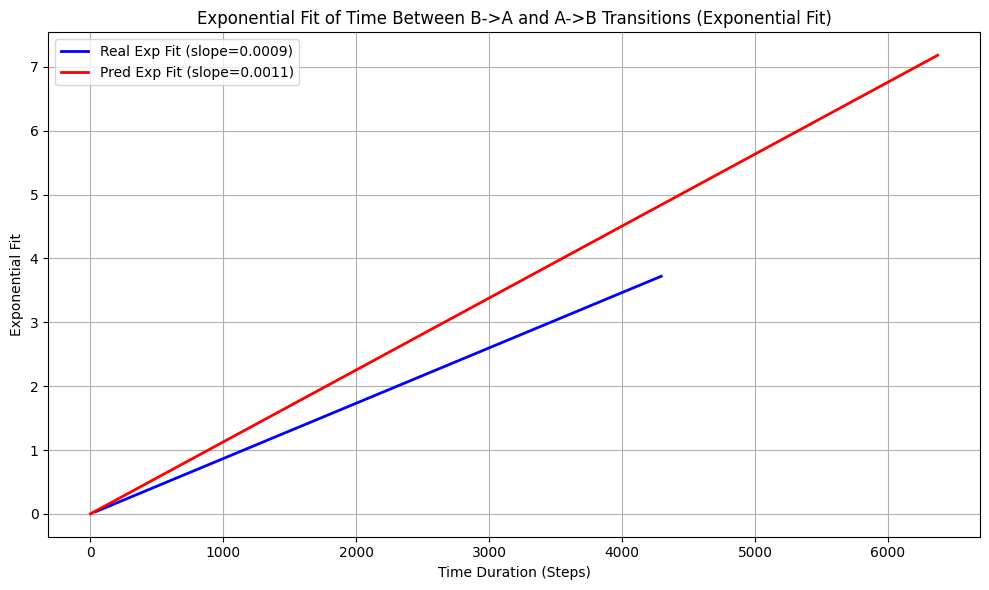

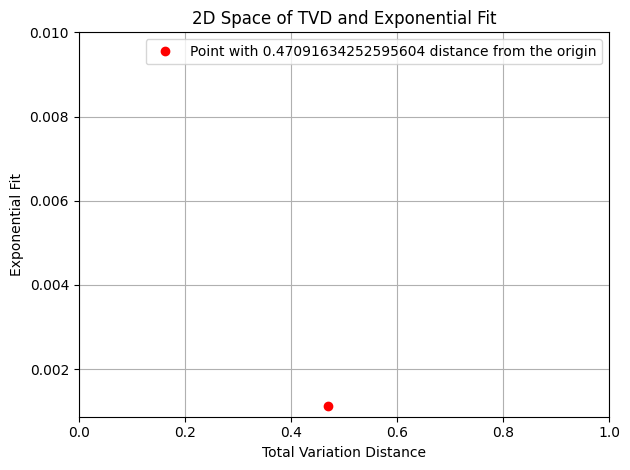

Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_4/timeseries
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_4/expo_fit
Created subfolder: /home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-06 10:50:23.070444/model_at_4/2D
Epoch 1, 
                Reconstrunction Loss: 700.43359375,
                KL Divergence Loss: 1391.1678466796875

                Validation Reconstrunction Loss: 1661.9429931640625,
                Validation KL Divergence Loss: 3604.928955078125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


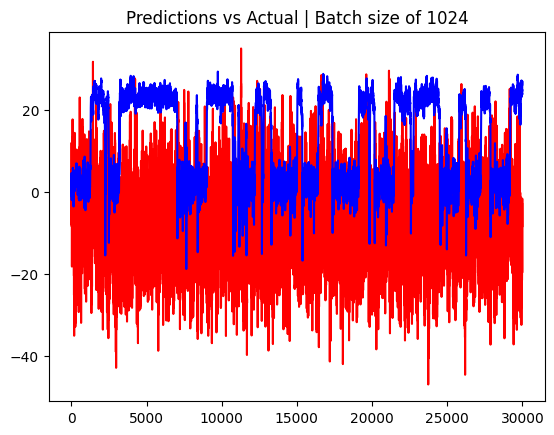

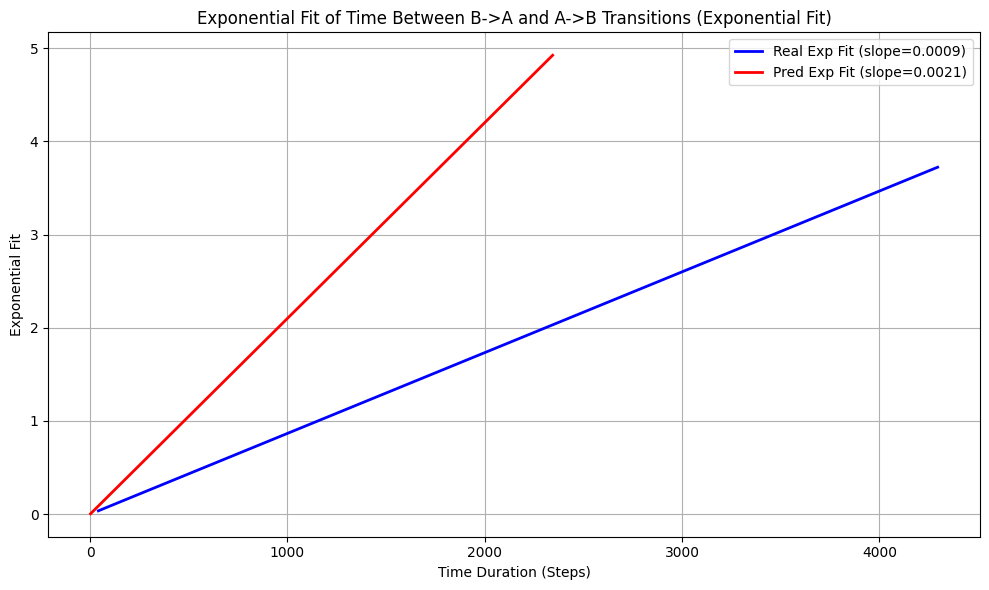

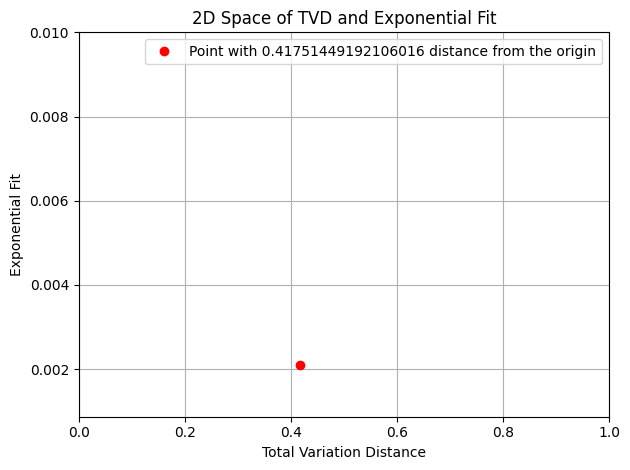

Epoch 2, 
                Reconstrunction Loss: 608.0752563476562,
                KL Divergence Loss: 703.017578125

                Validation Reconstrunction Loss: 1358.174560546875,
                Validation KL Divergence Loss: 1743.802978515625
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


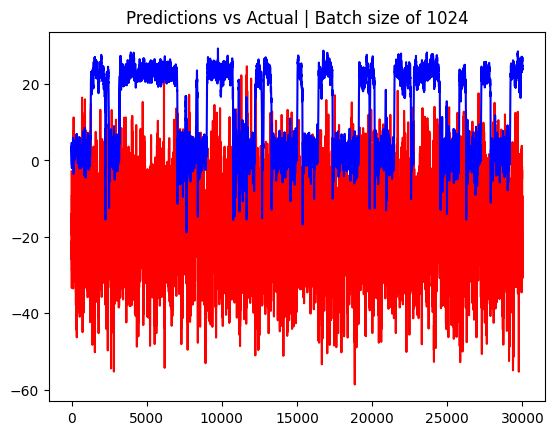

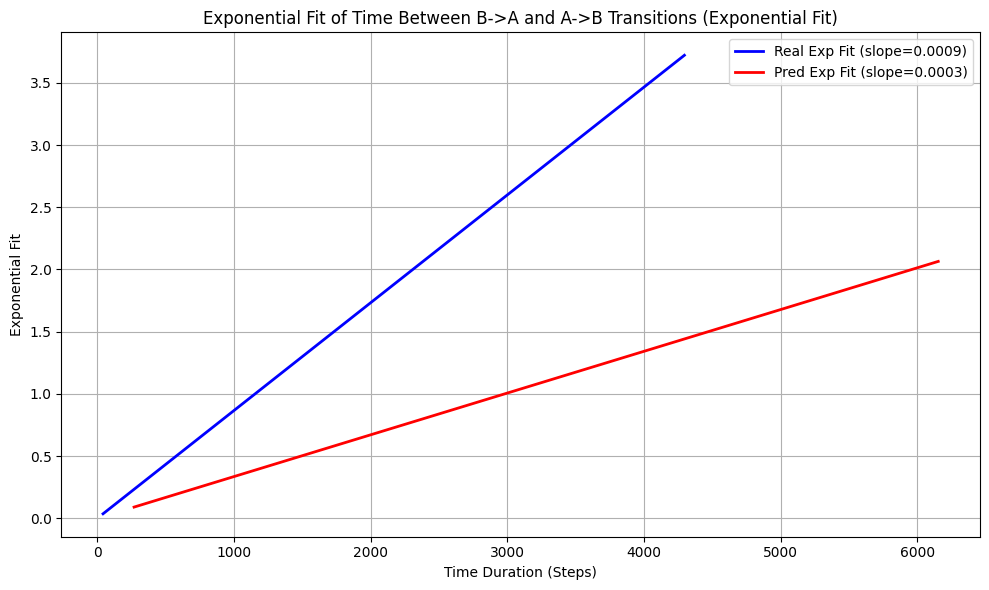

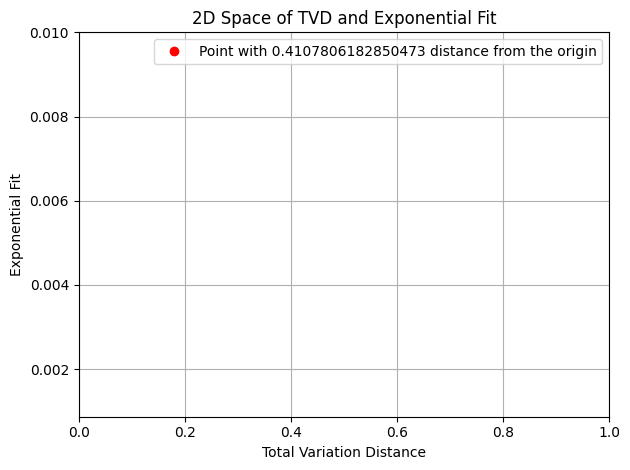

Epoch 3, 
                Reconstrunction Loss: 525.0516357421875,
                KL Divergence Loss: 479.287841796875

                Validation Reconstrunction Loss: 1460.075439453125,
                Validation KL Divergence Loss: 1176.3114013671875
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


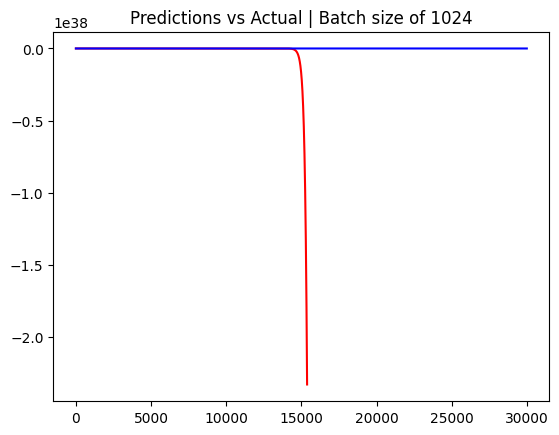

No transitions detected in predictions with current bounds!


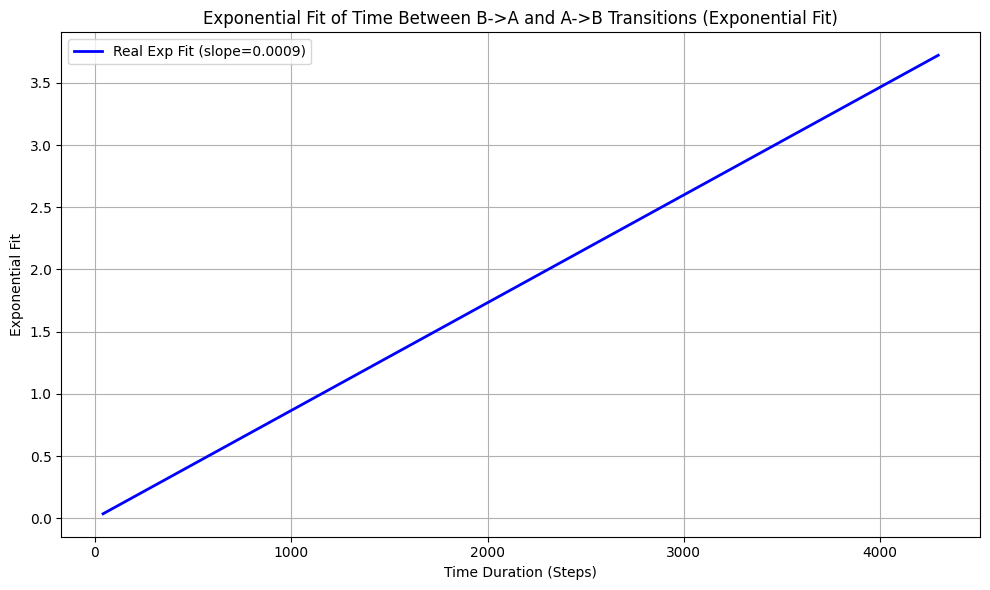

Weights experienced explosion!
Epoch 4, 
                Reconstrunction Loss: 643.7181396484375,
                KL Divergence Loss: 366.6512756347656

                Validation Reconstrunction Loss: 1280.57080078125,
                Validation KL Divergence Loss: 879.6776733398438
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


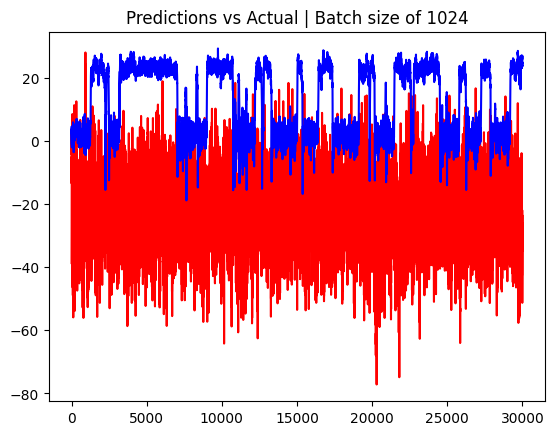

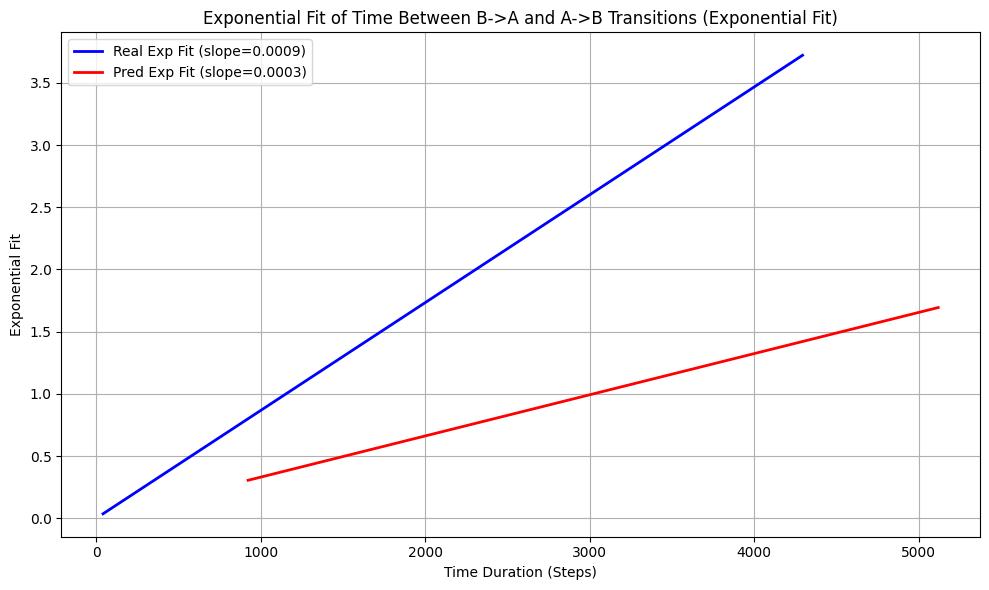

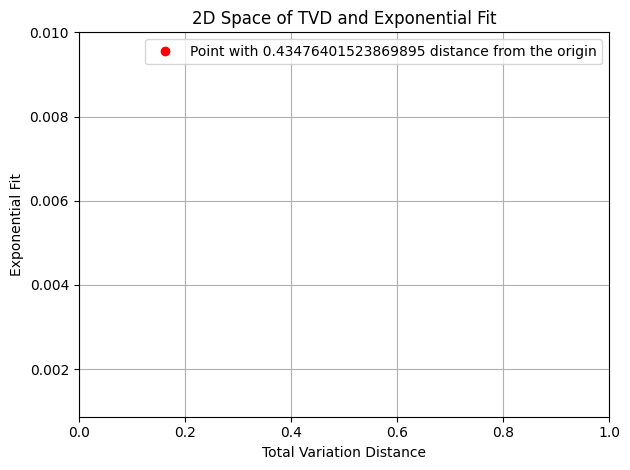

Epoch 5, 
                Reconstrunction Loss: 499.542236328125,
                KL Divergence Loss: 284.389892578125

                Validation Reconstrunction Loss: 1539.20458984375,
                Validation KL Divergence Loss: 678.309814453125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


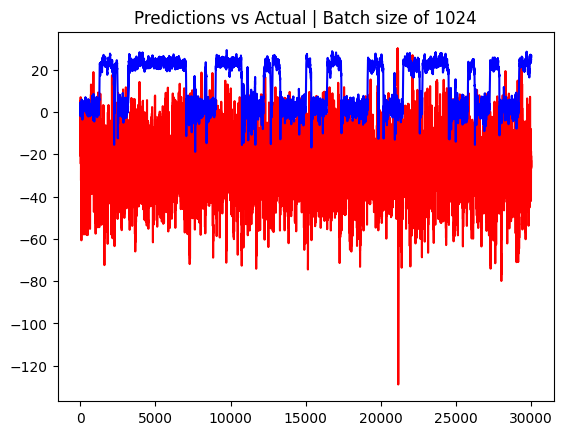

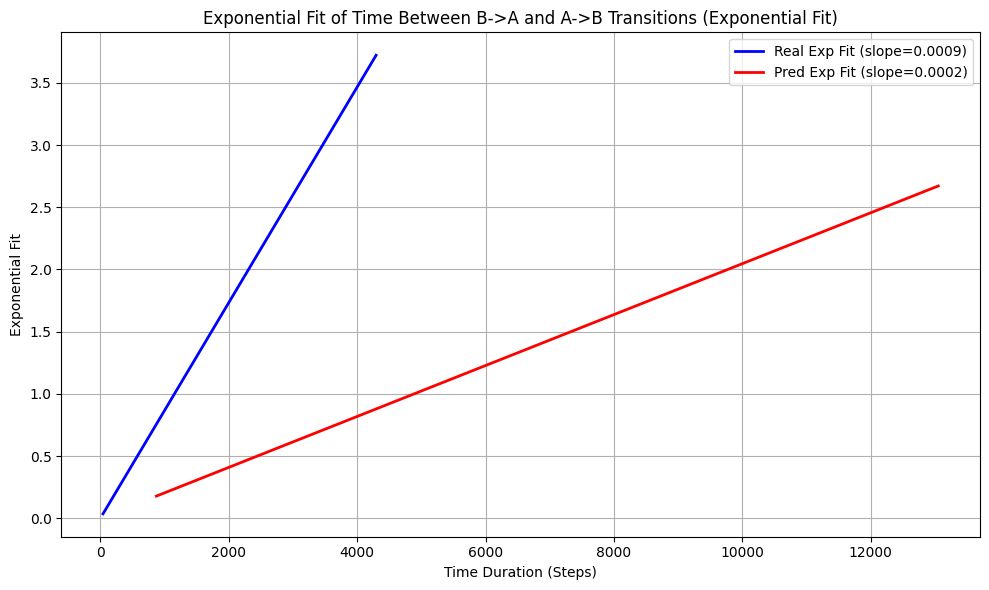

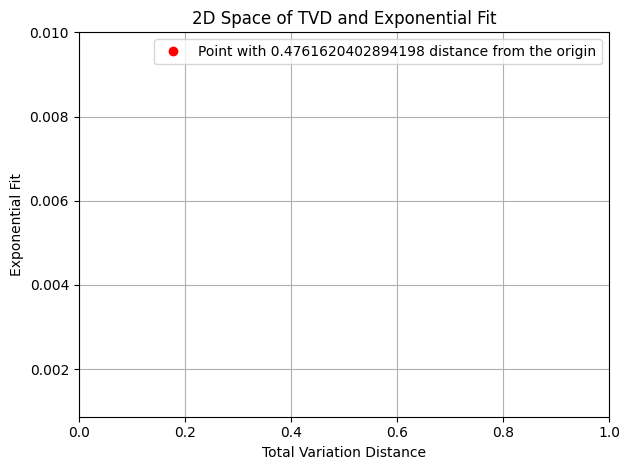

Epoch 6, 
                Reconstrunction Loss: 620.14501953125,
                KL Divergence Loss: 235.02552795410156

                Validation Reconstrunction Loss: 1829.981201171875,
                Validation KL Divergence Loss: 564.151611328125
torch.Size([1, 1024]) torch.Size([1, 75])
[10.68167255]
tensor([ 3.0674,  3.4938,  3.3835,  ..., 26.6962, 26.9568, 26.1085],
       dtype=torch.float64)


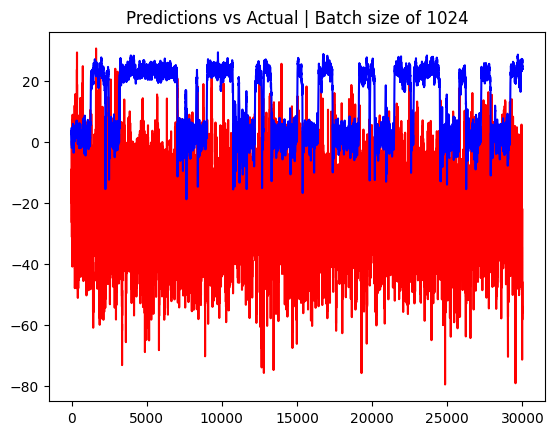

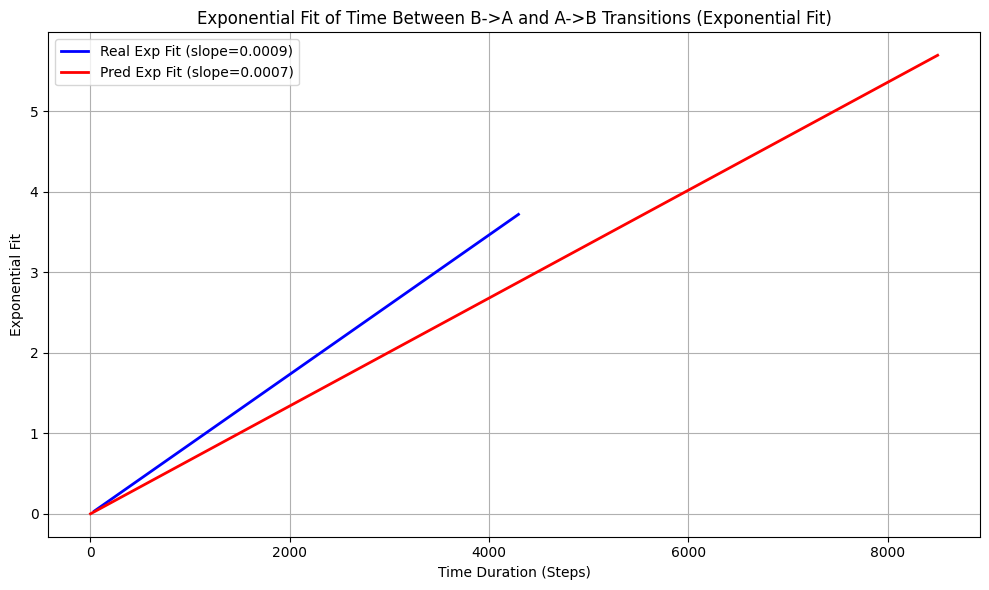

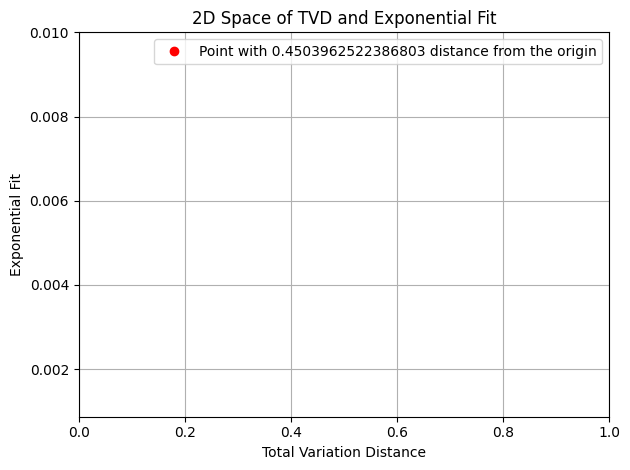

Epoch 7, 
                Reconstrunction Loss: 169.46755981445312,
                KL Divergence Loss: 196.63128662109375

                Validation Reconstrunction Loss: 504.2984619140625,
                Validation KL Divergence Loss: 468.30975341796875
torch.Size([1, 1024]) torch.Size([1, 75])


KeyboardInterrupt: 

In [8]:
# Training

import datetime
import os
import math

# Total Variation Distance
def total_variation_distance(p,q):
	p = np.array(p)
	q = np.array(q)
	return 0.5 * np.sum(np.abs(p-q))

latent_dims = [1024]
num_cycles = 5

for latent_dim in latent_dims:
    real_data = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
    lat_folder = f"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat{latent_dim}_at_{datetime.datetime.now()}"
    os.makedirs(lat_folder)
    for cycle in range(0,num_cycles):
        
        # Initialize the model, optimizer, and loss function
        model = ConditionalVAE(latent_dim)
        model = model.cuda()
        optimizer = optim.Adam(model.parameters(), lr=0.0001)
        num_epochs = 10

        folder = f"{lat_folder}/model_at_{cycle}"
        os.makedirs(folder)
        subfolders = ['timeseries', 'expo_fit', '2D']
        
        # Create each subdirectory inside the main folder
        for subfolder in subfolders:
            path = os.path.join(folder, subfolder)
            os.mkdir(path)
            print(f"Created subfolder: {path}")

        # from torchsummary import summary

        # summary(model, input_size = [(128, 1, 75), (128, 75)])
        # Train the model
        for epoch in range(num_epochs):
            model.train()
            for batch in range (0, trainN, batch_size):

                input_batch = psi_train_input[batch:batch + batch_size,:]
                label_batch = psi_train_label[batch:batch + batch_size,:]

                optimizer.zero_grad()

                output, mu, logvar = model(label_batch.float().cuda(), input_batch.float().cuda())

                # Reconstruction loss
                reconstruction_loss = F.mse_loss(output, label_batch.float().cuda(), reduction="sum")
                # KL divergence loss
                kl_loss = 0.5 * (mu ** 2 + torch.exp(logvar) - 1 - logvar).sum()
                
                # Total loss
                loss = reconstruction_loss + 10 * kl_loss

                loss.backward()
                optimizer.step()

            print(f'''Epoch {epoch+1}, 
                Reconstrunction Loss: {reconstruction_loss},
                KL Divergence Loss: {kl_loss}''')

            # Validation Loss
            for batch in range (0, valN, batch_size):

                input_batch = psi_val_input[batch:batch + batch_size,:]
                label_batch = psi_val_label[batch:batch + batch_size,:]
                
                output, mu, logvar = model(label_batch.float().cuda(), input_batch.float().cuda())
                reconstruction_loss = F.mse_loss(output, label_batch.float().cuda(), reduction="sum")
                kl_loss = 0.5 * (mu ** 2 + torch.exp(logvar) - 1 - logvar).sum()
                val_loss = reconstruction_loss + 10 * kl_loss # Experiment HIGHER coefficients
                # Print both reconstruction_loss and kl_loss

            print(f'''
                Validation Reconstrunction Loss: {reconstruction_loss},
                Validation KL Divergence Loss: {kl_loss}''')
            
            # Inference

            initial_cond = torch.reshape(torch.tensor(psi[0,:]), [1, 75])
            time_step = 30000
            z = torch.zeros([1,latent_dim])
            num_ens = 1
            pred = np.zeros ([time_step, 75, num_ens])

            for k in range (0, time_step):

                for ens in range (0, num_ens):
                    if (k ==0):

                        z = torch.randn_like(z)
                        print(z.shape, initial_cond.shape)
                        y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()
                        pred[k,:,ens] = y
                        y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
                        initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])

                    else:
                        select_ens = np.random.randint(0,num_ens,1)
                        z = torch.randn_like(z)
                        y = (model.decode(z.float().cuda(),torch.reshape(torch.tensor(pred[k-1,:,select_ens]),[1,75]).float().cuda())).detach().cpu().numpy()
                        pred[k,:, ens] = y
                        y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
                        initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])

            # Denormalize final preds
            print(std_psi[:, 63])
            pred_mean = pred * std_psi[:, 63] + mean_psi[:, 63]

            # Denormalize test labels
            actual_values = psi_train_label[:time_step, 63] * std_psi[:, 63] + mean_psi[:, 63]
            print(actual_values)

            plt.plot(pred_mean[0:30000,63],'r')
            plt.plot(actual_values[0:30000],'b')
            plt.title(f"Predictions vs Actual | Batch size of {batch_size}")
            plt.savefig(f'{folder}/prediction_epoch_{epoch+1}.png')
            plt.show()

            real_data_1d = real_data[:30000, 0, 63]  # Now shape is (309700,)
            predictions_1d = pred_mean[:, 63]  # shape (300000,)

            # Define bounds (assuming they apply to both datasets)
            upper_bound = 53.8 / 2.8935
            lower_bound = 1.75 / 2.8935

            # Function to calculate transition durations
            def calculate_transition_durations(y_values, upper_bound, lower_bound):
                times_between_transitions = []
                transition_start = None
                above_upper = False
                below_lower = False

                for i in range(1, len(y_values)):
                    if y_values[i] < lower_bound:  
                        below_lower = True
                        above_upper = False
                    elif y_values[i] > upper_bound:  
                        if below_lower and transition_start is not None:
                            times_between_transitions.append(i - transition_start)
                            transition_start = None  
                        above_upper = True
                        below_lower = False

                    if below_lower and transition_start is None:
                        transition_start = i

                return times_between_transitions

            # Compute transition durations for real data
            real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)

            # Compute transition durations for predictions data
            pred_durations = calculate_transition_durations(predictions_1d, upper_bound, lower_bound)

            # Plot setup
            plt.figure(figsize=(10, 6))
            exponential_fit_pred = 0

            # === REAL DATA CCDF AND FIT ===
            if len(real_durations) == 0:
                print("No transitions detected in real data with current bounds!")
            else:
                real_data_sorted = np.sort(real_durations)
                x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
                exponential_fit_real = 1/np.mean(real_data_sorted)
                y_values_real = exponential_fit_real*x_line_real
                plt.plot(x_line_real, y_values_real, 'b-', label=f'Real Exp Fit (slope={exponential_fit_real:.4f})', linewidth=2)

            # === PREDICTIONS CCDF AND FIT ===
            if len(pred_durations) == 0:
                print("No transitions detected in predictions with current bounds!")
            else:
                pred_data_sorted = np.sort(pred_durations)
                x_line_pred = np.linspace(min(pred_data_sorted), max(pred_data_sorted), 100)
                exponential_fit_pred = 1/np.mean(pred_data_sorted)
                y_values_pred = exponential_fit_pred*x_line_pred
                plt.plot(x_line_pred, y_values_pred, 'r-', label=f'Pred Exp Fit (slope={exponential_fit_pred:.4f})', linewidth=2)

            # Plot labels and formatting
            plt.xlabel('Time Duration (Steps)')
            plt.ylabel('Exponential Fit')
            plt.title('Exponential Fit of Time Between B->A and A->B Transitions (Exponential Fit)')
            plt.yscale("linear")  # y-axis log scale
            plt.xscale("linear")  # x-axis linear scale
            plt.grid()
            plt.legend()
            plt.tight_layout()
            save_path = os.path.join(folder, "expo_fit")
            save_path = os.path.join(save_path, f"expo_fit_plot_{epoch}.png")
            plt.savefig(save_path)
            plt.show()

            if pred_mean[:, 63].max() <= 100 or pred_mean[:, 63].min() >= -100 and exponential_fit_pred != 0:
                pred_hist, _ = np.histogram(pred_mean, bins=50, density=True)
                actual_hist, _ = np.histogram(actual_values,bins=50,density=True)

                tvd = total_variation_distance(pred_hist,actual_hist)

                save_path = folder
                save_path = os.path.join(folder, "2D")
                save_path = os.path.join(save_path, f"2D_plot_{epoch}.png")
                plt.plot(tvd,exponential_fit_pred, "ro", label=f"Point with {math.sqrt(tvd**2+exponential_fit_pred**2)} distance from the origin")
                plt.xlabel("Total Variation Distance")
                plt.ylabel("Exponential Fit")
                plt.title("2D Space of TVD and Exponential Fit")
                plt.xlim(0,1)
                plt.ylim(exponential_fit_real,0.0100)
                plt.grid()
                plt.legend()
                plt.tight_layout()
                plt.savefig(save_path)
                plt.show()
            else:
                print("Weights experienced explosion!")

            

In [ ]:
# Inference + Tests
import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random

# Initialize the model, optimizer, and loss function
model = ConditionalVAE(latent_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_at_checkpoint_3_promising_1/checkpoint_3"

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

initial_cond = torch.reshape(torch.tensor(psi[0,:]), [1, 75])
time_step = 300000
z = torch.zeros([1,latent_dim])
num_ens = 1
pred = np.zeros ([time_step, 75, num_ens])

for k in range (0, time_step):

    for ens in range (0, num_ens):
        if (k ==0):

            z = torch.randn_like(z)
            print(z.shape, initial_cond.shape)
            y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()
            pred[k,:,ens] = y
            y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
            initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])

        else:
            select_ens = np.random.randint(0,num_ens,1)
            z = torch.randn_like(z)
            y = (model.decode(z.float().cuda(),torch.reshape(torch.tensor(pred[k-1,:,select_ens]),[1,75]).float().cuda())).detach().cpu().numpy()
            pred[k,:, ens] = y
            y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
            initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])

# Denormalize final preds
print(std_psi[:, 63])
pred_mean = pred * std_psi[:, 63] + mean_psi[:, 63]

# Denormalize test labels
actual_values = psi[:time_step, 63] * std_psi[:, 63] + mean_psi[:, 63]
print(actual_values)

plt.figure(figsize=(20,8))
plt.plot(pred_mean[0:300000,63],'r')
plt.plot(actual_values[0:300000],'b')
plt.grid(True)
plt.title(f"Predictions vs Actual | Checkpoint 4(best)")
plt.savefig(f'/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/plots/temp_preds/prediction_vs_actual_{datetime.datetime.now()}.png')
plt.show()
plt.cla()

#FLAGS to determine testing
plot_data = 1
#what level do you want to plot
level = 63
CCDF = 1
TVD = 1
Bi_modal_distribution = 1
single_step_profiles = 1
#for the single_step_profiles
NUM_SAMPLES = 5
LEVEL = 63

# Total Variation Distance
def total_variation_distance(p,q):
	p = np.array(p)
	q = np.array(q)
	return 0.5 * np.sum(np.abs(p-q))

#Initialize Data
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

# Load the data; shape = (300000, 2, 75)
real_data = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
#reshape the predictions so that it matches the real_data shape
predictions = pred_mean.reshape(300000, 1, 75)

print(predictions.shape)
print(real_data.shape)

timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"testing_at_{timestamp}"
os.mkdir(folder)
subfolders = ['timeseries', 'expo_fit', '2D', 'single_step_profiles']
# Create each subdirectory inside the main folder
for subfolder in subfolders:
    path = os.path.join(folder, subfolder)
    os.mkdir(path)
    print(f"Created subfolder: {path}")
SAVE_DIR = os.path.join(folder, "single_step_profiles")

if (plot_data):
    #note that the value 300000 will have to change depending on the real and predictions data length
    u_profile_real = real_data[:300000, 1, level]  # Match time length with predictions
    u_profile_pred = predictions[:, level]
    time_steps = np.arange(len(u_profile_pred))

    # === Plot ===
    plt.figure(figsize=(14, 6))

    plt.plot(time_steps, u_profile_real, label='Real Data', alpha=0.7)
    plt.plot(time_steps, u_profile_pred, label='Predictions', linestyle='--')


    # Labels, legend, and formatting
    plt.xlabel('Time step')
    plt.ylabel('U (m/s)')
    plt.title(f'Time Series of U at Vertical Level {level}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "timeseries")
    save_path = os.path.join(save_path, "real_prediction_plot")
    plt.savefig(save_path)
    plt.show()

if (CCDF):
    real_data_1d = real_data[:30000, 0, 63]  # Now shape is (309700,)
    predictions_1d = pred_mean[:, 63]  # shape (300000,)

    # Define bounds (assuming they apply to both datasets)
    upper_bound = 53.8 / 2.8935
    lower_bound = 1.75 / 2.8935

    # Function to calculate transition durations
    def calculate_transition_durations(y_values, upper_bound, lower_bound):
        times_between_transitions = []
        transition_start = None
        above_upper = False
        below_lower = False

        for i in range(1, len(y_values)):
            if y_values[i] < lower_bound:  
                below_lower = True
                above_upper = False
            elif y_values[i] > upper_bound:  
                if below_lower and transition_start is not None:
                    times_between_transitions.append(i - transition_start)
                    transition_start = None  
                above_upper = True
                below_lower = False

            if below_lower and transition_start is None:
                transition_start = i

        return times_between_transitions

    # Compute transition durations for real data
    real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)

    # Compute transition durations for predictions data
    pred_durations = calculate_transition_durations(predictions_1d, upper_bound, lower_bound)

    # Plot setup
    plt.figure(figsize=(10, 6))

    # === REAL DATA CCDF AND FIT ===
    if len(real_durations) == 0:
        print("No transitions detected in real data with current bounds!")
    else:
        real_data_sorted = np.sort(real_durations)
        x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
        exponential_fit_real = 1/np.mean(real_data_sorted)
        y_values_real = exponential_fit_real*x_line_real
        plt.plot(x_line_real, y_values_real, 'b-', label=f'Real Exp Fit (slope={exponential_fit_real:.4f})', linewidth=2)

    # === PREDICTIONS CCDF AND FIT ===
    if len(pred_durations) == 0:
        print("No transitions detected in predictions with current bounds!")
    else:
        pred_data_sorted = np.sort(pred_durations)
        x_line_pred = np.linspace(min(pred_data_sorted), max(pred_data_sorted), 100)
        exponential_fit_pred = 1/np.mean(pred_data_sorted)
        y_values_pred = exponential_fit_pred*x_line_pred
        plt.plot(x_line_pred, y_values_pred, 'r-', label=f'Pred Exp Fit (slope={exponential_fit_pred:.4f})', linewidth=2)

    # Plot labels and formatting
    plt.xlabel('Time Duration (Steps)')
    plt.ylabel('Exponential Fit')
    plt.title('Exponential Fit of Time Between B->A and A->B Transitions (Exponential Fit)')
    plt.yscale("linear")  # y-axis log scale
    plt.xscale("linear")  # x-axis linear scale
    plt.grid()
    plt.legend()
    plt.tight_layout()
    save_path = os.path.join(folder, "expo_fit")
    save_path = os.path.join(save_path, f"expo_fit_plot_{epoch}.png")
    plt.savefig(save_path)
    plt.show()

if (TVD):
    if pred_mean[:, 63].max() <= 100 or pred_mean[:, 63].min() >= -100:
        pred_hist, _ = np.histogram(pred_mean, bins=50, density=True)
        actual_hist, _ = np.histogram(actual_values,bins=50,density=True)

        tvd = total_variation_distance(pred_hist,actual_hist)

        save_path = folder
        save_path = os.path.join(folder, "2D")
        save_path = os.path.join(save_path, f"2D_plot_{epoch}.png")
        plt.plot(tvd,exponential_fit_pred, "ro", label=f"Point with {math.sqrt(tvd**2+exponential_fit_pred**2)} distance from the origin")
        plt.xlabel("Total Variation Distance")
        plt.ylabel("Exponential Fit")
        plt.title("2D Space of TVD and Exponential Fit")
        plt.xlim(0,1)
        plt.ylim(exponential_fit_real,0.0100)
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()
    else:
        print("Weights experienced explosion!")

if (Bi_modal_distribution):
    zonal_wind_data_real = real_data[:, 1, 63]  # variable index 1 (e.g., zonal wind), level 60
    zonal_wind_data_predictions = predictions[:, 63]  # variable index 0 (predictions), level 60

    print(f"Shape of zonal_wind_data_real: {zonal_wind_data_real.shape}")
    print(f"Shape of zonal_wind_data_predictions: {zonal_wind_data_predictions.shape}")

    # Plot the bimodal histogram
    plt.figure(figsize=(12, 6))

    # Create histograms (overlaid)
    sns.histplot(zonal_wind_data_real, bins=50, kde=True, color='black', alpha=0.6, element='step', label='Real Data')
    sns.histplot(zonal_wind_data_predictions, bins=50, kde=True, color='red', alpha=0.6, element='step', label='Predictions')

    # Customize plot labels and title
    plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
    plt.xlabel('Zonal Wind (m/s)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add vertical lines at means
    plt.axvline(np.mean(zonal_wind_data_real), color='black', linestyle='--', label=f'Real Mean: {np.mean(zonal_wind_data_real):.2f}')
    plt.axvline(np.mean(zonal_wind_data_predictions), color='red', linestyle='--', label=f'Pred Mean: {np.mean(zonal_wind_data_predictions):.2f}')

    # Final plot settings
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "bi_modal_distribution")
    save_path = os.path.join(save_path, "bi_modal_distribution_plot")
    plt.savefig(save_path)
    plt.show()
if (single_step_profiles):
    # Ensure save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    model.eval()

    # === Randomly sample time points from real data ===
    time_indices = random.sample(range(0, real_data.shape[0] - 2), NUM_SAMPLES)
    print(f"Randomly sampled time steps: {time_indices}")

    # === Time series visualization ===
    real_data_timeseries = real_data[:, 1, LEVEL]
    time_steps_all = np.arange(len(real_data_timeseries))

    plt.figure(figsize=(12, 6))
    plt.plot(time_steps_all, real_data_timeseries, label="Real Data at Level 61", color='blue')

    # Mark sample points
    for idx_num, idx in enumerate(time_indices):
        plt.axvline(x=idx, color='green', linestyle='--', linewidth=2)
    if len(time_indices) > 0:
        plt.axvline(x=time_indices[0], color='green', linestyle='--', linewidth=2, label='Sampled Points')

    plt.title("Real Data Time Series with Sampled Points Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel("U (m/s) at Level 61")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = os.path.join(SAVE_DIR, "real_data_timeseries_with_samples.png")
    plt.savefig(save_path)
    plt.show()

    # === Iterate over each sampled time point ===
    for i, time_step in enumerate(time_indices):
        next_time_step = time_step + 1

        # === Real data: current and next ===
        real_current = real_data[time_step, 1, :]       
        real_next = real_data[next_time_step, 1, :]      

        # === Normalize real_current and make prediction for next step ===
        initial_cond = torch.reshape(torch.tensor(psi[time_step,:]), [1, 75])
        z = torch.zeros([1,latent_dim])
        num_ens = 1
        pred = np.zeros ([time_step, 75, num_ens])

        with torch.no_grad():
            z = torch.randn_like(z)
            print(z.shape, initial_cond.shape)
            y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()

        # === Denormalize predicted next ===
        pred_next_denorm = y.squeeze() * std_psi.squeeze() + mean_psi.squeeze()

        # === Extract U, Re(Psi), Im(Psi) components ===
        # U profiles
        U_current_real = real_current[51:74]
        U_next_real = real_next[51:74]
        U_next_pred = pred_next_denorm[51:74]

        # Re(Psi) profiles
        RePsi_current_real = real_current[0:24]
        RePsi_next_real = real_next[0:24]
        RePsi_next_pred = pred_next_denorm[0:24]

        # Im(Psi) profiles
        ImPsi_current_real = real_current[25:50]
        ImPsi_next_real = real_next[25:50]
        ImPsi_next_pred = pred_next_denorm[25:50]

        # === Differences ===
        U_diff_real = U_next_real - U_current_real
        U_diff_pred = U_next_pred - U_current_real

        RePsi_diff_real = RePsi_next_real - RePsi_current_real
        RePsi_diff_pred = RePsi_next_pred - RePsi_current_real

        ImPsi_diff_real = ImPsi_next_real - ImPsi_current_real
        ImPsi_diff_pred = ImPsi_next_pred - ImPsi_current_real

        # === Create a single figure with 3 rows (U, Re(Psi), Im(Psi)) ===
        fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns (Profile and Difference)

        z_levels_U = np.linspace(0, 70, 23)
        z_levels_RePsi = np.linspace(0, 70, 24)
        z_levels_ImPsi = np.linspace(0, 70, 25)

        # --- U ---
        axes[0, 0].plot(U_current_real, z_levels_U, 'x-', label="Real Current")
        axes[0, 0].plot(U_next_real, z_levels_U, 'd-', label="Real Next")
        axes[0, 0].plot(U_next_pred, z_levels_U, 's--', label="Predicted Next")
        axes[0, 0].set_title(f"U Profiles @ Step {time_step}")
        axes[0, 0].set_xlabel("U (m/s)")
        axes[0, 0].set_ylabel("Vertical Levels (km)")
        axes[0, 0].legend()

        axes[0, 1].plot(U_diff_real, z_levels_U, 'xb', label="Real Δ (Next - Current)")
        axes[0, 1].plot(U_diff_pred, z_levels_U, 'o--r', label="Pred Δ (Next - Current)")
        axes[0, 1].set_title("U Difference (Next - Current)")
        axes[0, 1].set_xlabel("ΔU (m/s)")
        axes[0, 1].legend()

        # --- Re(Psi) ---
        axes[1, 0].plot(RePsi_current_real, z_levels_RePsi, 'x-', label="Real Current")
        axes[1, 0].plot(RePsi_next_real, z_levels_RePsi, 'd-', label="Real Next")
        axes[1, 0].plot(RePsi_next_pred, z_levels_RePsi, 's--', label="Predicted Next")
        axes[1, 0].set_title(f"Re(Psi) Profiles @ Step {time_step}")
        axes[1, 0].set_xlabel("Re(Psi)")
        axes[1, 0].set_ylabel("Vertical Levels (km)")
        axes[1, 0].legend()

        axes[1, 1].plot(RePsi_diff_real, z_levels_RePsi, 'xb', label="Real Δ (Next - Current)")
        axes[1, 1].plot(RePsi_diff_pred, z_levels_RePsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[1, 1].set_title("Re(Psi) Difference (Next - Current)")
        axes[1, 1].set_xlabel("ΔRe(Psi)")
        axes[1, 1].legend()

        # --- Im(Psi) ---
        axes[2, 0].plot(ImPsi_current_real, z_levels_ImPsi, 'x-', label="Real Current")
        axes[2, 0].plot(ImPsi_next_real, z_levels_ImPsi, 'd-', label="Real Next")
        axes[2, 0].plot(ImPsi_next_pred, z_levels_ImPsi, 's--', label="Predicted Next")
        axes[2, 0].set_title(f"Im(Psi) Profiles @ Step {time_step}")
        axes[2, 0].set_xlabel("Im(Psi)")
        axes[2, 0].set_ylabel("Vertical Levels (km)")
        axes[2, 0].legend()

        axes[2, 1].plot(ImPsi_diff_real, z_levels_ImPsi, 'xb', label="Real Δ (Next - Current)")
        axes[2, 1].plot(ImPsi_diff_pred, z_levels_ImPsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[2, 1].set_title("Im(Psi) Difference (Next - Current)")
        axes[2, 1].set_xlabel("ΔIm(Psi)")
        axes[2, 1].legend()

        # === Finalize and Save ===
        plt.suptitle(f"Single Step Profile Comparisons at Time Step {time_step}", fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])

        save_path = os.path.join(SAVE_DIR, f"Profile_Summary_point_{time_step}.png")
        plt.savefig(save_path)
        plt.show()

        print(f"Combined plot saved for sampled point {time_step}")

    # Final debug
    print("Finished processing all sampled points.")
        # Debugging prints
    print(predictions.shape) 
    print(real_data.shape)